# Business Understanding

### Goal of the project
**The main aim of this project is to evaluate the COVID-19 impact on economy**

#### Economy
Various economic factors are considered for evaluation.
Following factors are considered:-
1. GDP
2. Unemployment Rate
3. CPI (Only for Germany)
4. Forex Rates 

#### Countries
This project will consider only few limited countries.
This selection is made based on countries with  High COVID Cases ,Large Economies ,Developed Vs Developing Countries and  Continental differentiation
Following countries have been considered:-
1. Germany
2. India
3. USA
4. UK
5. Italy
6. China

#### Currency
Based on the country selection, we consider the currencies of the selected countries. 
Note: The currecies's rates are considered with respect to 1 Euro.
Following currencies are considered:-
1. Indian Rupees
2. US Dollar
3. UK Pound Sterling
4. Chinese Yuen


# Data Understanding & Preparation

### 1) Importing Datasets

In [306]:
import pandas as pd
import numpy as np
from scipy import stats
df_covid19_data=pd.read_csv("covid-19.csv")
df_aggr_covid19_data=pd.read_csv("aggr_covid_data.csv")
df_unemployment=pd.read_csv("unemploy_new.csv")
df_CPI_Import_Export_Aggr=pd.read_csv("CPI_Export_Import_Aggr.csv")


### 2) Displaying Datasets

##### A. COVID-19 Dataset

In [307]:
df_covid19_data.head()

,Date,Country/Region,Province/State,Confirmed,Recovered,Deaths
0,22-01-2020,Afghanistan,NaN,0,0.0,0
1,23-01-2020,Afghanistan,NaN,0,0.0,0
2,24-01-2020,Afghanistan,NaN,0,0.0,0
3,25-01-2020,Afghanistan,NaN,0,0.0,0
4,26-01-2020,Afghanistan,NaN,0,0.0,0


##### B. COVID-19 Aggregated Dataset

In [308]:
df_aggr_covid19_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498


In [309]:
df_aggr_covid19_data


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.498
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62234,ZWE,Africa,Zimbabwe,2021-01-21,30047.0,639.0,668.429,917.0,38.0,40.143,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
62235,ZWE,Africa,Zimbabwe,2021-01-22,30523.0,476.0,630.571,962.0,45.0,42.286,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
62236,ZWE,Africa,Zimbabwe,2021-01-23,31007.0,484.0,589.429,974.0,12.0,41.571,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535
62237,ZWE,Africa,Zimbabwe,2021-01-24,31320.0,313.0,588.143,1005.0,31.0,41.714,...,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.535


##### C. Unemployment Dataset

In [310]:
df_unemployment.head()


,Month,Country,Unemployment_Rate_Percent
0,1,Germany,3.4
1,2,Germany,3.6
2,3,Germany,3.8
3,4,Germany,4.0
4,5,Germany,4.2


##### D. Consumer Price Index, Import Price Index, Export Price Index of Germany Dataset

In [311]:
df_CPI_Import_Export_Aggr.head()

,Year,Months,import_prices_index,Change on previous month in(%),Change on previous year's month in(%),export_prices_index,Change on previous month in(%).1,Change on previous year's month in(%).1,Consumer price index,Change on previous year's month in(%).2,Change on previous month in(%).2
0,2019,January,102.2,-0.2,0.8,102.2,0.1,1.1,103.4,1.4,-0.8
1,2019,February,102.5,0.3,1.6,102.3,0.1,1.3,103.8,1.5,0.4
2,2019,March,102.5,-,1.7,102.4,0.1,1.3,104.2,1.3,0.4
3,2019,April,102.8,0.3,1.4,102.6,0.2,1.3,105.2,2,1
4,2019,May,102.7,-0.1,-0.2,102.5,-0.1,0.7,105.4,1.4,0.2


### 3) Data Rearrangement & Transformation

##### A) Dropping all rows except the rows that include Country: Germany, India, Italy, USA, UK and China 

Dataset: Aggregated COVID-19 
Function: Drop()

(Selected based on : High COVID Cases ; Large Economies ; Developed Vs Developing Countries; Continental differentiation)

In [312]:
df_aggr_covid19_data=df_aggr_covid19_data.drop(df_aggr_covid19_data.index[df_aggr_covid19_data["location"] != 'Germany']
                          & df_aggr_covid19_data.index[df_aggr_covid19_data["location"] != 'India']  
                          & df_aggr_covid19_data.index[df_aggr_covid19_data["location"] != 'China'] 
                          & df_aggr_covid19_data.index[df_aggr_covid19_data["location"] != 'Italy']
                          & df_aggr_covid19_data.index[df_aggr_covid19_data["location"] != 'United States'] 
                          & df_aggr_covid19_data.index[df_aggr_covid19_data["location"] != 'United Kingdom']) 
df_aggr_covid19_data.head()

<ipython-input-312-7d3d48e8b59a>:1: FutureWarning:

Index.__and__ operating as a set operation is deprecated, in the future this will be a logical operation matching Series.__and__.  Use index.intersection(other) instead



,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
11542,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
11543,CHN,Asia,China,2020-01-23,643.0,95.0,NaN,18.0,1.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
11544,CHN,Asia,China,2020-01-24,920.0,277.0,NaN,26.0,8.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
11545,CHN,Asia,China,2020-01-25,1406.0,486.0,NaN,42.0,16.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
11546,CHN,Asia,China,2020-01-26,2075.0,669.0,NaN,56.0,14.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752


##### B) Selecting rows that are within the range 1st January 2020 - 31st December 2020

Dataset: Aggregated COVID-19 
Function: Parsing the date into day,month and year coulmn

(Selected based on: COVID-19 Rise from 2020 Start worldwide)

In [313]:
#Using a boolean mask:

df_aggr_covid19_data['date'] = pd.to_datetime(df_aggr_covid19_data['date']) 
mask = (df_aggr_covid19_data['date'] > '2020-1-1') & (df_aggr_covid19_data['date'] <= '2020-12-31')
df_aggr_covid19_data.loc[mask]
df_aggr_covid19_data.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
11542,CHN,Asia,China,2020-01-22,548.0,NaN,NaN,17.0,NaN,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
11543,CHN,Asia,China,2020-01-23,643.0,95.0,NaN,18.0,1.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
11544,CHN,Asia,China,2020-01-24,920.0,277.0,NaN,26.0,8.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
11545,CHN,Asia,China,2020-01-25,1406.0,486.0,NaN,42.0,16.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752
11546,CHN,Asia,China,2020-01-26,2075.0,669.0,NaN,56.0,14.0,NaN,...,15308.712,0.7,261.899,9.74,1.9,48.4,NaN,4.34,76.91,0.752


##### C) Extracting the month and year from date as seperate columns

Dataset: Aggregated COVID-19 
Function: groupBy() , sum()

In [314]:
df_aggr_covid19_data['month'] = df_aggr_covid19_data['date'].dt.month
df_aggr_covid19_data['year'] = df_aggr_covid19_data['date'].dt.year

##### D) Filtering based on date range and countries  & Performing summation 

Using group by function to group values by only those values that are within the date range and countries specefied.
Using the sum() function to calculate the summation of total cases per month within a country. (Monthly new cases)

Dataset: Aggregated COVID-19 <br>
Function: groupBy() , sum()

In [315]:
df_aggr_covid19_data=df_aggr_covid19_data.groupby(['year','location','month'])['new_cases'].sum().to_frame(name = 'Monthly_new_cases').reset_index()
df_aggr_covid19_data=df_aggr_covid19_data.drop(df_aggr_covid19_data.index[df_aggr_covid19_data["year"] == 2021])
df_aggr_covid19_data.head()


,year,location,month,Monthly_new_cases
0,2020,China,1,9254.0
1,2020,China,2,69554.0
2,2020,China,3,2923.0
3,2020,China,4,1677.0
4,2020,China,5,190.0


In [316]:
df_aggr_covid19_data

,year,location,month,Monthly_new_cases
0,2020,China,1,9254.0
1,2020,China,2,69554.0
2,2020,China,3,2923.0
3,2020,China,4,1677.0
4,2020,China,5,190.0
...,...,...,...,...
67,2020,United States,8,1458899.0
68,2020,United States,9,1206247.0
69,2020,United States,10,1926777.0
70,2020,United States,11,4496140.0


##### E) Introducing 'Monthly_new_cases' and 'PG_Rate/Percentage Growth Rate' coulmns to the DataFrame
 
   - Monthly_new_cases: Represents the total number of new covid cases that rose within a month for a particuar country.
   - PG_Rate/Percentage Growth Rate: Stores the Monthly Growth Rate in COVID Cases within that rose within a month for a particuar country.
    
    Following formula has been used for calculating the percentage:-
    
   - df['Percentage Growth Rate']=   df['Monthly_new_cases'] / df['Monthly_new_cases'].shift(1) * 100 -100
   - df['PG_Rate']= (df['Monthly_new_cases'] - df['Monthly_new_cases'].shift(1)) * 100/ df['Monthly_new_cases'].shift(1)
                 
      *** For e.g Percentage Growth Rate : Total cases in feb - Total cases in jan) * 100 / Total cases in Jan
                 
   _Monthly_new_cases = Storing the total number of cases in the next month (For e.g February in China)_
   _['Monthly_new_cases'].shift(1) = Storing the total number of cases in the previous month (For e.g January in China)_
    
   Dataset: Aggregated COVID-19 
   Function: Computing the Percentage Growth of COVID-19 cases

In [317]:
#df_aggr_covid19_data=df_aggr_covid19_data.groupby(['year','location','month'])['new_cases'].sum().to_frame(name = 'Monthly_new_cases').reset_index()
df_aggr_covid19_data['Percentage Growth Rate']= df_aggr_covid19_data['Monthly_new_cases'] / df_aggr_covid19_data['Monthly_new_cases'].shift(1) * 100 -100
df_aggr_covid19_data['PG_Rate']= (df_aggr_covid19_data['Monthly_new_cases'] - df_aggr_covid19_data['Monthly_new_cases'].shift(1)) * 100/ df_aggr_covid19_data['Monthly_new_cases'].shift(1)
df_aggr_covid19_data.head()

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate
0,2020,China,1,9254.0,NaN,NaN
1,2020,China,2,69554.0,651.610115,651.610115
2,2020,China,3,2923.0,-95.797510,-95.797510
3,2020,China,4,1677.0,-42.627438,-42.627438
4,2020,China,5,190.0,-88.670244,-88.670244


##### F)  Cleaning, Transforming and Merging the Unemployment DataSet with COVID-19 DataSet

In [318]:
#Data Cleaning

# tables are joined on date and location, therefore check location description first
print (df_aggr_covid19_data.location.unique())
print (df_unemployment.Country.unique())

# write out abbreviations UK and US in their full length within df_UNEMPLOYMENT
df_unemployment['Country'] = df_unemployment['Country'].replace({'USA':'United States'})
df_unemployment['Country'] = df_unemployment['Country'].replace({'UK':'United Kingdom'})

# create new dataframe which is supposed to hold merged data
df_MERGED = df_aggr_covid19_data
df_MERGED['Unemployment_Rate_Percent'] = np.NaN

# set values of new dataframes's column Unemployment_Rate_Percent 
# joining where year, location and month match
for srcIndex, srcRow in df_MERGED.iterrows():
    srcLocation = srcRow['location']
    srcMonth = srcRow['month']
    for tgIndex, tgRow in df_unemployment.iterrows():
        if (srcLocation == tgRow['Country'] and srcMonth == tgRow['Month']):
           df_MERGED.loc[srcIndex,'Unemployment_Rate_Percent'] = tgRow['Unemployment_Rate_Percent']
df_MERGED

['China' 'Germany' 'India' 'Italy' 'United Kingdom' 'United States']
['Germany' 'India' 'China' 'Italy' 'USA' 'UK']


,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
0,2020,China,1,9254.0,NaN,NaN,5.3
1,2020,China,2,69554.0,651.610115,651.610115,6.2
2,2020,China,3,2923.0,-95.797510,-95.797510,5.9
3,2020,China,4,1677.0,-42.627438,-42.627438,6.0
4,2020,China,5,190.0,-88.670244,-88.670244,5.9
...,...,...,...,...,...,...,...
67,2020,United States,8,1458899.0,-24.200596,-24.200596,8.4
68,2020,United States,9,1206247.0,-17.317991,-17.317991,7.8
69,2020,United States,10,1926777.0,59.733206,59.733206,6.9
70,2020,United States,11,4496140.0,133.350305,133.350305,6.7


In [319]:
#creating a duplicate dataframe of df_MERGED
df_all_countries = df_MERGED.copy()

In [320]:
#For getting more information regarding data type and checking if there are non-null values
df_MERGED.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   year                       72 non-null     int64  
 1   location                   72 non-null     object 
 2   month                      72 non-null     int64  
 3   Monthly_new_cases          72 non-null     float64
 4   Percentage Growth Rate     71 non-null     float64
 5   PG_Rate                    71 non-null     float64
 6   Unemployment_Rate_Percent  72 non-null     float64
dtypes: float64(4), int64(2), object(1)
memory usage: 6.6+ KB


In [321]:
#Checking if there exists a NaN Value
df_MERGED.isna()

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
0,False,False,False,False,True,True,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
67,False,False,False,False,False,False,False
68,False,False,False,False,False,False,False
69,False,False,False,False,False,False,False
70,False,False,False,False,False,False,False


In [322]:
# A detailed view of all values. Checking which coulmns contain NaN values
print (df_MERGED.values)

[[2020 'China' 1 9254.0 nan nan 5.3]
 [2020 'China' 2 69554.0 651.6101145450616 651.6101145450616 6.2]
 [2020 'China' 3 2923.0 -95.79750984846306 -95.79750984846306 5.9]
 [2020 'China' 4 1677.0 -42.62743756414642 -42.627437564146426 6.0]
 [2020 'China' 5 190.0 -88.67024448419798 -88.67024448419797 5.9]
 [2020 'China' 6 639.0 236.31578947368422 236.31578947368422 5.7]
 [2020 'China' 7 2870.0 349.1392801251957 349.1392801251956 5.7]
 [2020 'China' 8 2259.0 -21.289198606271782 -21.28919860627178 5.6]
 [2020 'China' 9 631.0 -72.0672864099159 -72.0672864099159 5.4]
 [2020 'China' 10 821.0 30.110935023771788 30.11093502377179 5.3]
 [2020 'China' 11 1536.0 87.08891595615103 87.08891595615104 5.2]
 [2020 'China' 12 3061.0 99.28385416666669 99.28385416666667 5.2]
 [2020 'Germany' 1 5.0 -99.83665468801046 -99.83665468801046 3.4]
 [2020 'Germany' 2 74.0 1380.0 1380.0 3.6]
 [2020 'Germany' 3 71729.0 96831.08108108108 96831.08108108108 3.8]
 [2020 'Germany' 4 91201.0 27.146621310766903 27.146621310

In [323]:
#Replacing the NaN values by 0 only for values in Unemployment Rate and PG_Rate
df_MERGED.Unemployment_Rate_Percent = df_MERGED.Unemployment_Rate_Percent.fillna(0)
df_MERGED.PG_Rate = df_MERGED.PG_Rate.fillna(0)

In [324]:
#Checking if the changes have been implemented
df_MERGED.values

array([[2020, 'China', 1, 9254.0, nan, 0.0, 5.3],
       [2020, 'China', 2, 69554.0, 651.6101145450616, 651.6101145450616,
        6.2],
       [2020, 'China', 3, 2923.0, -95.79750984846306, -95.79750984846306,
        5.9],
       [2020, 'China', 4, 1677.0, -42.62743756414642,
        -42.627437564146426, 6.0],
       [2020, 'China', 5, 190.0, -88.67024448419798, -88.67024448419797,
        5.9],
       [2020, 'China', 6, 639.0, 236.31578947368422, 236.31578947368422,
        5.7],
       [2020, 'China', 7, 2870.0, 349.1392801251957, 349.1392801251956,
        5.7],
       [2020, 'China', 8, 2259.0, -21.289198606271782,
        -21.28919860627178, 5.6],
       [2020, 'China', 9, 631.0, -72.0672864099159, -72.0672864099159,
        5.4],
       [2020, 'China', 10, 821.0, 30.110935023771788, 30.11093502377179,
        5.3],
       [2020, 'China', 11, 1536.0, 87.08891595615103, 87.08891595615104,
        5.2],
       [2020, 'China', 12, 3061.0, 99.28385416666669, 99.28385416666667,
     

In [325]:
#Rounding off the values in df_MERGED
df_MERGED.round(1)
df_MERGED = df_MERGED.round(1)
df_MERGED

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
0,2020,China,1,9254.0,NaN,0.0,5.3
1,2020,China,2,69554.0,651.6,651.6,6.2
2,2020,China,3,2923.0,-95.8,-95.8,5.9
3,2020,China,4,1677.0,-42.6,-42.6,6.0
4,2020,China,5,190.0,-88.7,-88.7,5.9
...,...,...,...,...,...,...,...
67,2020,United States,8,1458899.0,-24.2,-24.2,8.4
68,2020,United States,9,1206247.0,-17.3,-17.3,7.8
69,2020,United States,10,1926777.0,59.7,59.7,6.9
70,2020,United States,11,4496140.0,133.4,133.4,6.7


##### G) Dealing with Outliers

##### Step 1: Detecing Outliers (Quantile Method)

In [326]:
max_threshold = df_MERGED['PG_Rate'].quantile(0.85)
max_threshold

485.7850000000004

In [327]:
min_threshold = df_MERGED['PG_Rate'].quantile(0.25)
min_threshold

-29.900000000000002

In [328]:
df_MERGED[df_MERGED['PG_Rate']>max_threshold]

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
1,2020,China,2,69554.0,651.6,651.6,6.2
13,2020,Germany,2,74.0,1380.0,1380.0,3.6
14,2020,Germany,3,71729.0,96831.1,96831.1,3.8
26,2020,India,3,1394.0,69600.0,69600.0,8.8
27,2020,India,4,33466.0,2300.7,2300.7,23.5
37,2020,Italy,2,1126.0,56200.0,56200.0,9.4
38,2020,Italy,3,104664.0,9195.2,9195.2,8.5
45,2020,Italy,10,364569.0,698.7,698.7,9.5
49,2020,United Kingdom,2,59.0,2850.0,2850.0,4.0
50,2020,United Kingdom,3,38754.0,65584.7,65584.7,4.0


In [329]:
df_MERGED[df_MERGED['PG_Rate']< min_threshold]

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
2,2020,China,3,2923.0,-95.8,-95.8,5.9
3,2020,China,4,1677.0,-42.6,-42.6,6.0
4,2020,China,5,190.0,-88.7,-88.7,5.9
8,2020,China,9,631.0,-72.1,-72.1,5.4
12,2020,Germany,1,5.0,-99.8,-99.8,3.4
16,2020,Germany,5,20401.0,-77.6,-77.6,4.2
17,2020,Germany,6,12008.0,-41.1,-41.1,4.3
24,2020,India,1,1.0,-100.0,-100.0,7.2
34,2020,India,11,1278727.0,-31.7,-31.7,6.5
35,2020,India,12,803865.0,-37.1,-37.1,9.1


##### Step 2: Treating the Outliers by transforming values  (Capping using Percentile Method)

In [330]:
#Creating a copy of df_MERGED DataSet
from scipy import stats
df_MERGED_copy = df_MERGED.copy()
df_MERGED_copy

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
0,2020,China,1,9254.0,NaN,0.0,5.3
1,2020,China,2,69554.0,651.6,651.6,6.2
2,2020,China,3,2923.0,-95.8,-95.8,5.9
3,2020,China,4,1677.0,-42.6,-42.6,6.0
4,2020,China,5,190.0,-88.7,-88.7,5.9
...,...,...,...,...,...,...,...
67,2020,United States,8,1458899.0,-24.2,-24.2,8.4
68,2020,United States,9,1206247.0,-17.3,-17.3,7.8
69,2020,United States,10,1926777.0,59.7,59.7,6.9
70,2020,United States,11,4496140.0,133.4,133.4,6.7


In [331]:
#Coulmn that comprises outliers
col_PG_Rate = ['PG_Rate']
col_PG_Rate

['PG_Rate']

In [332]:
#Using the Capping Percentile Method
def percentile_capping(df, cols, from_low_end, from_high_end):
    for col in cols:

        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [333]:
percentile_capping(df_MERGED_copy, col_PG_Rate, 0.15, 0.15)

In [334]:
#Initial Max Min Values 
df_MERGED.describe()

,year,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
count,72.0,72.000000,7.200000e+01,7.100000e+01,7.200000e+01,72.000000
mean,2020.0,6.500000,5.109250e+05,2.026642e+04,1.998494e+04,6.972222
std,0.0,3.476278,1.042439e+06,1.346947e+05,1.337641e+05,3.620879
min,2020.0,1.000000,1.000000e+00,-1.000000e+02,-1.000000e+02,3.400000
25%,2020.0,3.750000,2.717250e+03,-3.050000e+01,-2.990000e+01,4.500000
50%,2020.0,6.500000,4.687900e+04,4.250000e+01,4.115000e+01,5.900000
75%,2020.0,9.250000,6.368570e+05,2.450000e+02,2.406500e+02,8.725000
max,2020.0,12.000000,6.406076e+06,1.130206e+06,1.130206e+06,23.500000


In [335]:
#Max Min Values after transformation
df_MERGED_copy.describe()

,year,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
count,72.0,72.000000,7.200000e+01,7.100000e+01,72.000000,72.000000
mean,2020.0,6.500000,5.109250e+05,2.026642e+04,149.597222,6.972222
std,0.0,3.476278,1.042439e+06,1.346947e+05,245.583132,3.620879
min,2020.0,1.000000,1.000000e+00,-1.000000e+02,-72.100000,3.400000
25%,2020.0,3.750000,2.717250e+03,-3.050000e+01,-29.900000,4.500000
50%,2020.0,6.500000,4.687900e+04,4.250000e+01,41.150000,5.900000
75%,2020.0,9.250000,6.368570e+05,2.450000e+02,240.650000,8.725000
max,2020.0,12.000000,6.406076e+06,1.130206e+06,651.600000,23.500000


In [336]:
#Values before transformation
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df_MERGED)

    year        location  month  Monthly_new_cases  Percentage Growth Rate  \
0   2020           China      1             9254.0                     NaN   
1   2020           China      2            69554.0                   651.6   
2   2020           China      3             2923.0                   -95.8   
3   2020           China      4             1677.0                   -42.6   
4   2020           China      5              190.0                   -88.7   
5   2020           China      6              639.0                   236.3   
6   2020           China      7             2870.0                   349.1   
7   2020           China      8             2259.0                   -21.3   
8   2020           China      9              631.0                   -72.1   
9   2020           China     10              821.0                    30.1   
10  2020           China     11             1536.0                    87.1   
11  2020           China     12             3061.0              

In [337]:
#Values after transformation
with pd.option_context('display.max_rows', None, 'display.max_columns', None):  
    print(df_MERGED_copy)

    year        location  month  Monthly_new_cases  Percentage Growth Rate  \
0   2020           China      1             9254.0                     NaN   
1   2020           China      2            69554.0                   651.6   
2   2020           China      3             2923.0                   -95.8   
3   2020           China      4             1677.0                   -42.6   
4   2020           China      5              190.0                   -88.7   
5   2020           China      6              639.0                   236.3   
6   2020           China      7             2870.0                   349.1   
7   2020           China      8             2259.0                   -21.3   
8   2020           China      9              631.0                   -72.1   
9   2020           China     10              821.0                    30.1   
10  2020           China     11             1536.0                    87.1   
11  2020           China     12             3061.0              

# Data Visualization


### COVID-19 & Unemployment 
### Countries : Germany, India, USA, UK, Italy & China

##### 1) Unemployment Rate (Monthly Basis): Combied bar graph representing the Unemployment Rate on Monthly Basis in the filtered countries. 

<Figure size 1080x360 with 0 Axes>

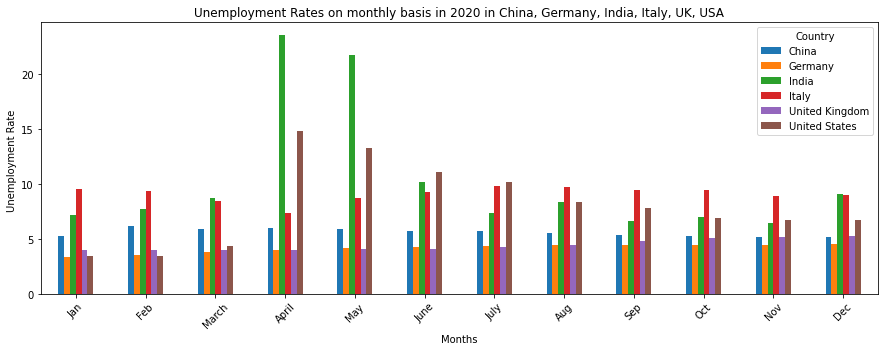

In [338]:
import matplotlib.pyplot as plt
import seaborn as sns
#size of the graph

plt.figure(figsize=(15,5))
# x: index=month 
# y: values=Unemployment rate
# bar: coulmns=Country
ax1 = df_unemployment.pivot(index='Month',columns='Country',values='Unemployment_Rate_Percent').plot(kind='bar',figsize=(15,5))
 
#rotation of label on x-axis
plt.xticks(rotation=45)

#month is represented by number in the DataSet
#For e.g. Jan = 1, Feb = 2...Dec 12
#For more readable graph we convert the x-axis as month name instead of month number
labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[0] = 'Jan'
labels[1] = 'Feb'
labels[2] = 'March'
labels[3] = 'April'
labels[4] = 'May'
labels[5] = 'June'
labels[6] = 'July'
labels[7] = 'Aug'
labels[8] = 'Sep'
labels[9] = 'Oct'
labels[10] = 'Nov'
labels[11] = 'Dec'
ax1.set_xticklabels(labels)

# Add title and axis names
plt.title('Unemployment Rates on monthly basis in 2020 in China, Germany, India, Italy, UK, USA')
plt.xlabel('Months')
plt.ylabel('Unemployment Rate ')



#Display 
plt.show()

##### **Observation** <br>
- The graph shows that in most countries, the unemployment rate was maximum in April , March and May
- For India, the unemployment rate was highest in April followed by May, while the unemployment rate was highest in USA in April followed by June & May



###### 2) COVID-19 Growth Rate (Monthly Basis): Combined bar graph reprsenting the  COVID-19 Growth Rate on Monthly Basis in the filtered countries

Text(0, 0.5, 'COVID-19 Growth')

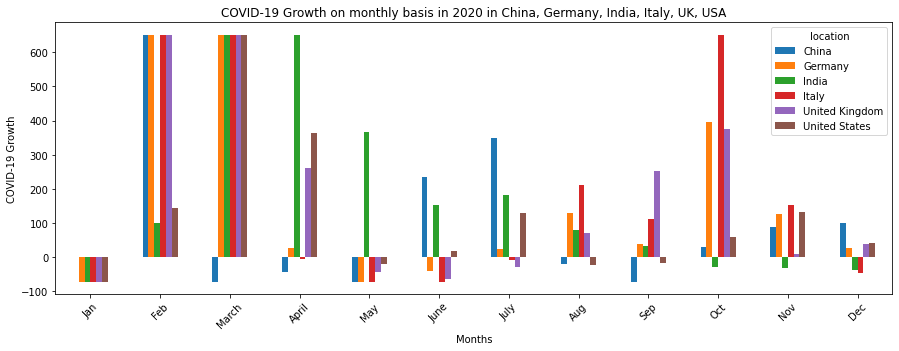

In [339]:
ax1 = df_MERGED_copy.pivot(index='month',columns='location',values='PG_Rate').plot(kind='bar',figsize=(15,5))
plt.xticks(rotation=45)
labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[0] = 'Jan'
labels[1] = 'Feb'
labels[2] = 'March'
labels[3] = 'April'
labels[4] = 'May'
labels[5] = 'June'
labels[6] = 'July'
labels[7] = 'Aug'
labels[8] = 'Sep'
labels[9] = 'Oct'
labels[10] = 'Nov'
labels[11] = 'Dec'
ax1.set_xticklabels(labels)
# Add title and axis names
plt.title('COVID-19 Growth on monthly basis in 2020 in China, Germany, India, Italy, UK, USA')
plt.xlabel('Months')
plt.ylabel('COVID-19 Growth')




##### **Observation** <br>
- As the graph shows, maxmimum growth rate in COVID-19 was observed in the months February & March in most of the countries 
- It is observed that China was able to effectively manage the growth rate and hence a derease in COVID-19 growth rate was seen from March to May
- The growth rate in India decreased subsequently after April.
- In other countries, conintuous fluctuations in growth rate are observed


###### 3) Scatter Plot depicting Unemployment Rates in all countries

In [340]:
#Plotting unemployment rate 
df_unemployment_copy=df_unemployment
import plotly.express as px
fig = px.scatter(df_unemployment, x="Month", y="Unemployment_Rate_Percent",color="Country",hover_data=['Month', "Unemployment_Rate_Percent"]) #,width=1200, height=900,
fig.show()

##### Observation

- The scatter plot graph is a similar as the bar graph that depicts the Unemployment Rate in various countries
- However, the advantage of this is that we can zoom and select a month or an area to filter the data according to our requirements. 

##### 4) Combo Chart representing Unemployment Rate Vs COVID Growth Rate in the filtered countries
This is a combo chart with Two Y-Axis


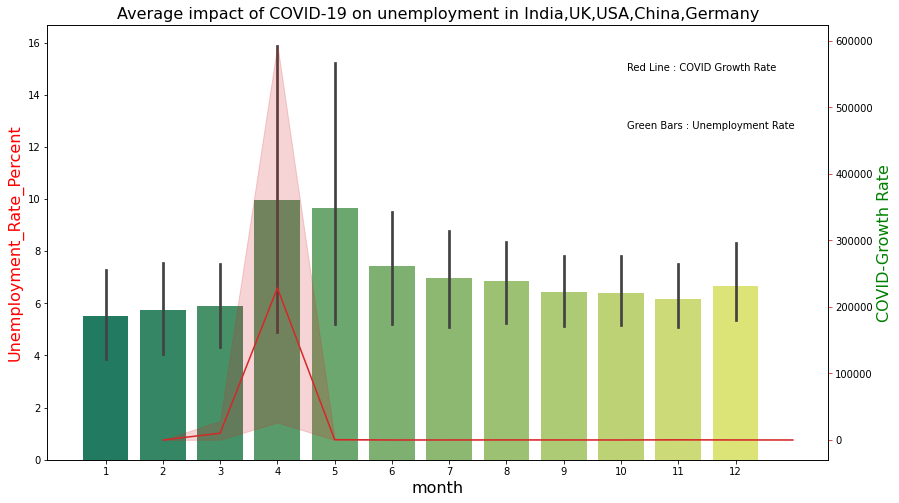

In [341]:
#Create combo chart
fig, ax1 = plt.subplots(figsize=(14,8))

#bar plot creation
ax1.set_title('Average impact of COVID-19 on unemployment in India,UK,USA,China,Germany' , fontsize=16)
ax1.set_xlabel('Month', fontsize=16)
ax1.set_ylabel('Unemployment Rate Percent', fontsize=16, color='red')
ax1 = sns.barplot(x='month', y='Unemployment_Rate_Percent', data = df_MERGED, palette='summer')
ax1.tick_params(axis='y')

plt.figtext(0.7, 0.8, "Red Line : COVID Growth Rate")
plt.figtext(0.7, 0.7, "Green Bars : Unemployment Rate")
#specify we want to share the same x-axis
ax2 = ax1.twinx()
color = 'tab:red'
#line plot creation
ax2.set_xlabel('Month', fontsize=16)
ax2.set_ylabel('COVID-Growth Rate', fontsize=16, color='green')
ax2 = sns.lineplot(x='month', y='PG_Rate', data = df_MERGED, sort=False, color=color)
ax2.tick_params(axis='y', color=color)


#show plot
plt.show()

##### Observation
- The red line depicts the unemployment rate that is seen to be highest in April. Similary, the bar chart represents COVID-19 Growth rate that is observed to be highest in April. (On Average for all countries)
- This proves that increase in COVID-19 Cases has resulted in increased unemployment rate in all countries (On average)

##### 5) Linear Regression (COVID-19 Growth Rate Vs Unemployment Rate for filtered countries)



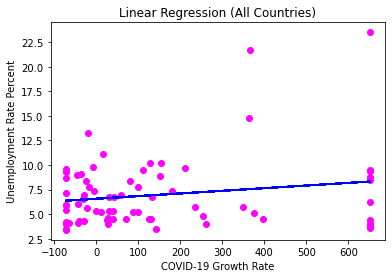

RMSE is 3.535333191988728
r2 is 0.033266528317951516


In [342]:
#importing python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

# describing dataset
df_MERGED_copy.describe()

#X =df_MERGED_copy['Unemployment_Rate_Percent'].values.reshape(-1,1) #reshape() is used to convert from 1-D to 2-D
#y =df_MERGED_copy['PG_Rate'].values.reshape(-1,1)

X =df_MERGED_copy['PG_Rate'].values.reshape(-1,1) #reshape() is used to convert from 1-D to 2-D
y =df_MERGED_copy['Unemployment_Rate_Percent'].values.reshape(-1,1)

np.any(np.isnan(X))
np.all(np.isfinite(y))

#Calling linear regression function
regressor = LinearRegression()

#Training model using fit()
regressor.fit(X,y)

#Predicting model
y_pred=regressor.predict(X)

#Visualizing the output
plt.scatter(X, y, color = 'magenta')
plt.plot(X, y_pred, color = 'blue')
plt.title('Linear Regression (All Countries)')
plt.xlabel('COVID-19 Growth Rate')
plt.ylabel('Unemployment Rate Percent')
plt.show()

#Calculating error metric
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print('RMSE is '+ str(rmse))
print('r2 is '+str(r2))

##### 6) Polynomial Regression (COVID-19 Growth Rate Vs Unemployment Rate for all countries)

- COVID-19 Growth Rate Vs Unemployment Rate for all countries


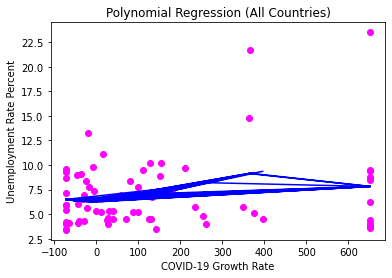

RMSE is 3.494304652741832
r2 is 0.055574755603483905


In [343]:
#Polynomial Regression 1
#Percentage Growth Rate of Unemployment Vs Number of Cases for all countries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

#dataset.describe() # describing dataset
df_MERGED_copy.describe()

#X =df_MERGED['PG_Rate(-1,1) #reshape() is used to convert from 1-D to 2-D
X =df_MERGED_copy['PG_Rate'].values.reshape(-1,1)
y =df_MERGED_copy['Unemployment_Rate_Percent'].values.reshape(-1,1)

#Converting input feature into their higher order
poly=PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly,y)
y_poly_pred=regressor.predict(X_poly)

#Visualizing output
plt.scatter(X, y, color = 'magenta')
plt.plot(X, y_poly_pred, color = 'blue')
plt.title('Polynomial Regression (All Countries)')
plt.xlabel('COVID-19 Growth Rate')
plt.ylabel('Unemployment Rate Percent')


plt.show()
rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print('RMSE is '+ str(rmse))
print('r2 is '+str(r2))

##### Observation
- Linear Regression : r2 approx 0.03 which is equal to 3%
- Polynomial Regression : r2 approx 0.05 which is equal to 5% <br>
<br>
The higher the r2 % value, the more accurate it is for computations. <br>
Therefore, in this case, Polynomial Regression's r2 value is more tha Linear Regression. <br>
Hence we conclude that Polynomial Regression is more precise in calculating the values. <br>

But neither of the r square values are very high. Therefore, calculating the unemployment rate based on covid growth rate won't be accurate for all countries. We need to consider regression models for individual countries for this purpose.

##### 7) Broken Line Graph depciting Unemployment Rate Vs COVID-19 Growth Rate

- The Broken Line Graph is considered for depicting the outliers.
- The COVID-19 Growth Rate has a spike of growth rate in month of march and when this is reprsented on graph, the scale is considered according to this highest value. 
- This results in unclear plotting of other months because the scale is too big for other months
- Hence by using the Broken Line Graph, we have bifuracted the graph into two halves.
- The outliers are represented by a differnt scale on the above half
- While the rest other values are represented by a uniform scale on the below half
- Moreover, since the scale of Unemployment Rate and COVID-19 Rate is also highly different from one another, we consider two Y-axis
- The first Y-Axis on the left side represents COVID-19 Growth Rate
- The second Y-Axis on the right side represents Unemployment Rate
- The X-Axis reprsents months


###### Steps for preparing a new DataFrame that stores aggregated values before plotting the Broken Line Graph 

In [344]:
#creating a duplicate dataframe of df_MERGED
df_all_countries = df_MERGED.copy()

In [345]:
#calculating the mean values of COVID-19 Growth Rate and Unemployment Rate
# here we create a new DataFrame called 'df_mean_countries'
# 'df_mean_countries' stores the mean values of covid-19 growth rate and unemployment rate
df_mean_countries = pd.DataFrame(df_all_countries,columns=['month','location','PG_Rate','Unemployment_Rate_Percent'])
df_mean_countries

,month,location,PG_Rate,Unemployment_Rate_Percent
0,1,China,0.0,5.3
1,2,China,651.6,6.2
2,3,China,-95.8,5.9
3,4,China,-42.6,6.0
4,5,China,-88.7,5.9
...,...,...,...,...
67,8,United States,-24.2,8.4
68,9,United States,-17.3,7.8
69,10,United States,59.7,6.9
70,11,United States,133.4,6.7


In [346]:
#orignal dataframe (without mean)
df_all_countries

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
0,2020,China,1,9254.0,NaN,0.0,5.3
1,2020,China,2,69554.0,651.6,651.6,6.2
2,2020,China,3,2923.0,-95.8,-95.8,5.9
3,2020,China,4,1677.0,-42.6,-42.6,6.0
4,2020,China,5,190.0,-88.7,-88.7,5.9
...,...,...,...,...,...,...,...
67,2020,United States,8,1458899.0,-24.2,-24.2,8.4
68,2020,United States,9,1206247.0,-17.3,-17.3,7.8
69,2020,United States,10,1926777.0,59.7,59.7,6.9
70,2020,United States,11,4496140.0,133.4,133.4,6.7


In [347]:
#Filtering the 'df_mean_countries' 
#Keeping only the coulmns who's mean we want to compute
df_mean_countries = pd.DataFrame(df_all_countries,columns=['month','location','PG_Rate','Unemployment_Rate_Percent'])
df_mean_countries

,month,location,PG_Rate,Unemployment_Rate_Percent
0,1,China,0.0,5.3
1,2,China,651.6,6.2
2,3,China,-95.8,5.9
3,4,China,-42.6,6.0
4,5,China,-88.7,5.9
...,...,...,...,...
67,8,United States,-24.2,8.4
68,9,United States,-17.3,7.8
69,10,United States,59.7,6.9
70,11,United States,133.4,6.7


In [348]:
#Grouping COVID-19 Growth Rate & Unemployment Rate % by month and then applying the aggreagtion & mean function
grouped = df_mean_countries.groupby('month')
Aggregated_PG_Rate = grouped['PG_Rate'].agg(np.mean)
Aggregated_Unemployment_Rate = grouped['Unemployment_Rate_Percent'].agg(np.mean)
print(Aggregated_PG_Rate)
print(Aggregated_Unemployment_Rate)

month
1        -83.300000
2      10220.750000
3     228553.516667
4        484.000000
5         10.633333
6         38.116667
7        107.650000
8         74.216667
9         57.683333
10       255.166667
11        79.616667
12        21.200000
Name: PG_Rate, dtype: float64
month
1     5.500000
2     5.750000
3     5.900000
4     9.950000
5     9.650000
6     7.450000
7     6.966667
8     6.850000
9     6.450000
10    6.383333
11    6.166667
12    6.650000
Name: Unemployment_Rate_Percent, dtype: float64


In [349]:
#Displaying mean of COVID-19 cases and Unemployment Rate Percent  for countries India, Germany, USA, UK, Italy & China into one dataframe
df_aggregated = pd.concat([Aggregated_PG_Rate, Aggregated_Unemployment_Rate], axis=1)
df_aggregated

,PG_Rate,Unemployment_Rate_Percent
month,,
1,-83.300000,5.500000
2,10220.750000,5.750000
3,228553.516667,5.900000
4,484.000000,9.950000
5,10.633333,9.650000
6,38.116667,7.450000
7,107.650000,6.966667
8,74.216667,6.850000
9,57.683333,6.450000


In [350]:
#Decalring a list of month
month = ['Jan', 'Feb', 'Mar', 'Apr' , 'May' , 'Jun' , 'Jul' , 'Aug', 'Sep','Oct','Nov','Dec'] 
df_aggregated['month'] = month
df_aggregated

,PG_Rate,Unemployment_Rate_Percent,month
month,,,
1,-83.300000,5.500000,Jan
2,10220.750000,5.750000,Feb
3,228553.516667,5.900000,Mar
4,484.000000,9.950000,Apr
5,10.633333,9.650000,May
6,38.116667,7.450000,Jun
7,107.650000,6.966667,Jul
8,74.216667,6.850000,Aug
9,57.683333,6.450000,Sep


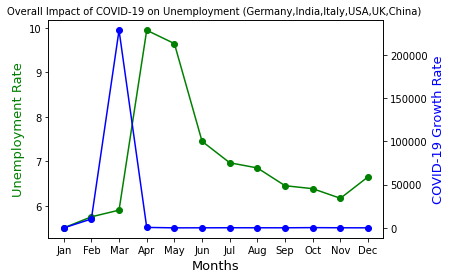

In [351]:
x = df_aggregated['month']
y1 = df_aggregated['Unemployment_Rate_Percent']
y2 = df_aggregated['PG_Rate']


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
curve1 = ax1.plot(x, y1, label='Unemployment_Rate_Percent',color='g', marker='o')
ax1.set_ylabel('Unemployment Rate', fontsize=13,color='g')
ax1.set_xlabel('Months', fontsize=13)
ax1.set_title('Overall Impact of COVID-19 on Unemployment (Germany,India,Italy,USA,UK,China) ' , fontsize=10)

curve2 = ax2.plot(x, y2, label='PG_Rate',color='b', marker='o')
ax2.set_ylabel('COVID-19 Growth Rate', fontsize=13,color='b')

plt.xticks(x)
labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[0] = 'Jan'
labels[1] = 'Feb'
labels[2] = 'Mar'
labels[3] = 'Apr'
labels[4] = 'May'
labels[5] = 'Jun'
labels[6] = 'Jul'
labels[7] = 'Aug'
labels[8] = 'Sep'
labels[9] = 'Oct'
labels[10] = 'Nov'
labels[11] = 'Dec'

ax1.set_xticklabels(labels)
plt.plot()
plt.show()

##### Observation
- Due to the outliers present in COVID-19 Growth Rate, the scale of the y-axis on right side is too big and hence we are unable to plot the other smaller data points of subsequent months. Hence we require a broken line graph with 2 Scales on one y-axis to incorporate the details and smaller points of other months

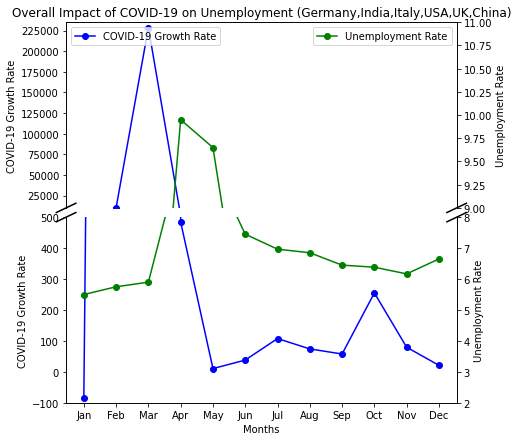

In [352]:
### import numpy as np
import matplotlib.pyplot as plt

# Start with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
fig.subplots_adjust(hspace=0.05)

# ax1 - is the top subplot
# ax2 - is the bottom subplot

# prepare twinned axes
ax3 = ax1.twinx()
ax4 = ax2.twinx()

# set limits for left y-axis
ax1.set_ylim(10000, 235000)  # outliers only
ax2.set_ylim(-100, 500)  # most of the data

# set limits for right y-axis (twinned)
ax3.set_ylim(9, 11)
ax4.set_ylim(2, 8)

# turn off spines
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)

# setup ticks
ax1.tick_params(bottom=False)
ax2.tick_params(bottom=True)

# plotting break diagonals
d = 0.025  # line length 
ax1.plot((-d, +d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax1.plot((1 - d, 1 + d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax2.plot((-d, +d), (1 - d, (1 + d)), c='k', clip_on=False, transform=ax2.transAxes)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), c='k', clip_on=False, transform=ax2.transAxes)


x = df_aggregated['month']
#yleft1 = df_aggregated['PG_Rate']
yleft2 = df_aggregated['PG_Rate']
yright = df_aggregated['Unemployment_Rate_Percent']

#ax1.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')
#ax2.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')

ax1.plot(x, yleft2, c='b', label='COVID-19 Growth Rate',marker='o')
ax2.plot(x, yleft2, c='b', label='COVID-19 Growth Rate',marker='o')

ax3.plot(x, yright, c='g', label='Unemployment Rate',marker='o')
ax4.plot(x, yright, c='g', label='Unemployment Rate',marker='o')

ax1.legend(loc=2)
ax3.legend(loc=1)

ax1.set_title("Overall Impact of COVID-19 on Unemployment (Germany,India,Italy,USA,UK,China)")
ax1.set_ylabel("COVID-19 Growth Rate")
ax2.set_ylabel("COVID-19 Growth Rate")
ax3.set_ylabel("Unemployment Rate")
ax4.set_ylabel("Unemployment Rate")
ax2.set_xlabel("Months")

plt.show()

##### Observation
- There are multiple fluctuations observed in the graph
- It is difficult to make any conclusions 
- We need to consider indiviudal countries for getting a better idea 

##### 10) Sub plots for comparing which country's unemployment rate was minimum or maximum affected due to COVID-19

##### Steps prior to plotting, for preparing a new DataFrame by using grouping and aggregation functions

In [353]:
#Using the df_MERGED dataframe again
df_MERGED

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
0,2020,China,1,9254.0,NaN,0.0,5.3
1,2020,China,2,69554.0,651.6,651.6,6.2
2,2020,China,3,2923.0,-95.8,-95.8,5.9
3,2020,China,4,1677.0,-42.6,-42.6,6.0
4,2020,China,5,190.0,-88.7,-88.7,5.9
...,...,...,...,...,...,...,...
67,2020,United States,8,1458899.0,-24.2,-24.2,8.4
68,2020,United States,9,1206247.0,-17.3,-17.3,7.8
69,2020,United States,10,1926777.0,59.7,59.7,6.9
70,2020,United States,11,4496140.0,133.4,133.4,6.7


In [354]:
#grouping unemployement rate by location and computing the aggregation
grouped = df_MERGED.groupby('location')
Aggregated_Unemployment = grouped['Unemployment_Rate_Percent'].agg(np.mean)
print(Aggregated_Unemployment)

location
China              5.616667
Germany            4.191667
India             10.358333
Italy              9.108333
United Kingdom     4.450000
United States      8.108333
Name: Unemployment_Rate_Percent, dtype: float64


In [355]:
#grouping monthly new cases by location and computing the aggregation
grouped = df_MERGED.groupby('location')
Aggregated_new_case = grouped['Monthly_new_cases'].agg(np.mean)
print(Aggregated_new_case)

location
China             7.951250e+03
Germany           1.467100e+05
India             8.555562e+05
Italy             1.755972e+05
United Kingdom    2.080192e+05
United States     1.671716e+06
Name: Monthly_new_cases, dtype: float64


In [356]:
#creating a new dataframe 'df_combo' with above grouped and mean values
df_combo= pd.concat([Aggregated_Unemployment, Aggregated_new_case], axis=1)
df_combo

,Unemployment_Rate_Percent,Monthly_new_cases
location,,
China,5.616667,7.951250e+03
Germany,4.191667,1.467100e+05
India,10.358333,8.555562e+05
Italy,9.108333,1.755972e+05
United Kingdom,4.450000,2.080192e+05
United States,8.108333,1.671716e+06


In [357]:
#resetting the index
df_combo = df_combo.reset_index()
df_combo

,location,Unemployment_Rate_Percent,Monthly_new_cases
0,China,5.616667,7.951250e+03
1,Germany,4.191667,1.467100e+05
2,India,10.358333,8.555562e+05
3,Italy,9.108333,1.755972e+05
4,United Kingdom,4.450000,2.080192e+05
5,United States,8.108333,1.671716e+06


In [358]:
#caluclating the ratio of COVID-19 Cases to Unemployment Rate
#CU Ratio denotes 'COVID-19:Unemployment' Ratio
df_combo['CU_Ratio']=  df_combo['Monthly_new_cases']/ df_combo['Unemployment_Rate_Percent'] 
df_combo

,location,Unemployment_Rate_Percent,Monthly_new_cases,CU_Ratio
0,China,5.616667,7.951250e+03,1415.652819
1,Germany,4.191667,1.467100e+05,35000.397614
2,India,10.358333,8.555562e+05,82595.929204
3,Italy,9.108333,1.755972e+05,19278.737420
4,United Kingdom,4.450000,2.080192e+05,46745.898876
5,United States,8.108333,1.671716e+06,206172.600206


<AxesSubplot:title={'center':'COVID Cases in various Countries'}, xlabel='location', ylabel='COVID Cases'>

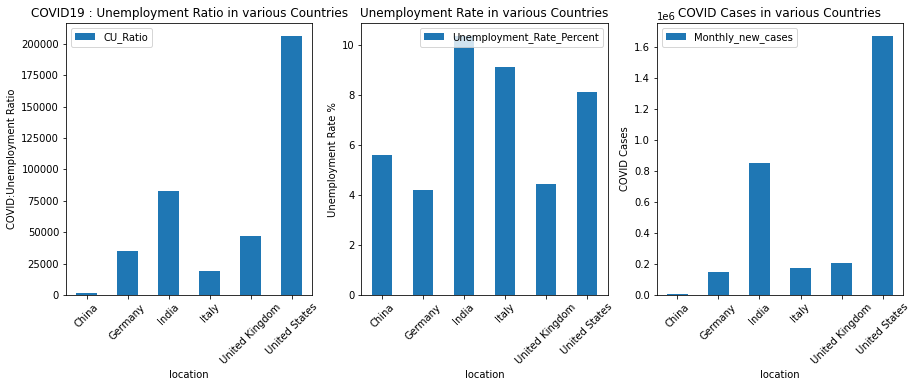

In [359]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(131) 
#131
#fig.tight_layout(pad=50.0)
ax1.set_ylabel("COVID:Unemployment Ratio")
ax1.set_xlabel("Countries")
ax1.set_title("COVID19 : Unemployment Ratio in various Countries")

# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(132)
#132
ax2.set_ylabel("Unemployment Rate %")
ax2.set_xlabel("Countries")
ax2.set_title("Unemployment Rate in various Countries")

# Divide the figure into a 1x2 grid, and give me the third section
ax3 = fig.add_subplot(133)
#133
ax3.set_ylabel("COVID Cases")
ax3.set_xlabel("Countries")
ax3.set_title("COVID Cases in various Countries")


df_combo.plot.bar(x='location', y='CU_Ratio', rot=45, ax=ax1)
df_combo.plot.bar(x='location', y='Unemployment_Rate_Percent', rot=45, ax=ax2)
df_combo.plot.bar(x='location', y='Monthly_new_cases', rot=45, ax=ax3)

#df.groupby('country').plot(x='year', y='unemployment', ax=ax1, legend=False)
#df.groupby('country')['unemployment'].mean().sort_values().plot(kind='barh', ax=ax2)

##### Oberservation
**COVID & Unemployemnt Ratio (CU Ratio)**
- USA's COVID-19 & Unemployment ratio is highest affected due to COVID-19, while China's ratio was least affected
- The top 3 countries with highest COVID-19 & Unemployment ratio are USA, India & UK

**Unemployment Rate**
- Although USA has highest CU Ratio, the unemployment rate is  highest in India
- Top 3 countries with highest unemployment rate are India,Italy & US

**COVID-19 Cases**
- Top 3 countries with highest COVID-19 are USA,India, UK

###### 11) Combo graph depicting mean of unemployment rate and monthly new cases

Text(0.5, 1.0, 'Unemployment Rate Vs COVID-19 Cases')

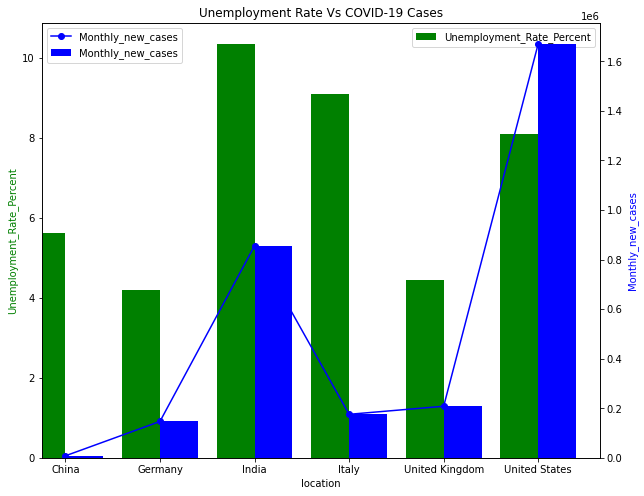

In [360]:
df_combo.set_index('location')
fig.set_figheight(5)
fig.set_figwidth(20)

df_combo
fig = plt.figure() # Create matplotlib figure
ax = fig.add_subplot(111) # Create matplotlib axes
ax2 = ax.twinx() # Create another axes that shares the same x-axis as ax.

width = 0.4

ax = df_combo.plot.bar(x='location', y='Unemployment_Rate_Percent', rot=0 , ax=ax ,position=1 , color='green', width=width ,figsize=(10,8))
ax2 = df_combo.plot.bar(x='location', y='Monthly_new_cases', rot=0 , ax=ax2 , color='blue', width=width, position=0)
ax2 = df_combo.plot.line(x='location', y='Monthly_new_cases', rot=0 , ax=ax2 , color='blue',marker='o')

#df_combo.Unemployment_Rate_Percent.plot(kind='bar', color='red', ax=ax, width=width, position=1, label='Unemployment_Rate_Percent')
#df_combo.Monthly_new_cases.plot(kind='bar', color='blue', ax=ax2, width=width, position=0 ,label='Monthly_new_cases' )

ax.set_ylabel('Unemployment_Rate_Percent',color='green')
ax2.set_ylabel('Monthly_new_cases',color='blue')

# Add some text for labels, title and custom x-axis tick labels, etc.

ax.set_title('Unemployment Rate Vs COVID-19 Cases')

###### Observation
- The total monthly new cases was highest in USA, however the unemployment rate was not that high
- On the contrary, the unemployment rate was highest in India, but the number of cases were not as high as USA
- Italy had compartively lower number of cases,but unemployment rate was still very high

###  Germany

In [361]:
#Filtering the data based on location :Germany

Germany=df_MERGED.loc[df_MERGED['location'] == 'Germany']
Germany

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
12,2020,Germany,1,5.0,-99.8,-99.8,3.4
13,2020,Germany,2,74.0,1380.0,1380.0,3.6
14,2020,Germany,3,71729.0,96831.1,96831.1,3.8
15,2020,Germany,4,91201.0,27.1,27.1,4.0
16,2020,Germany,5,20401.0,-77.6,-77.6,4.2
17,2020,Germany,6,12008.0,-41.1,-41.1,4.3
18,2020,Germany,7,14981.0,24.8,24.8,4.4
19,2020,Germany,8,34403.0,129.6,129.6,4.5
20,2020,Germany,9,48111.0,39.8,39.8,4.5
21,2020,Germany,10,238877.0,396.5,396.5,4.5


##### 1) Combined Line Graph depicting Unemployment Rate & COVID-19 Growth Rate in Germany (Including Outliers)

DataFrame = Germany

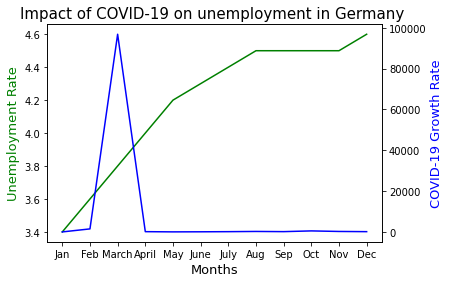

In [362]:
x = Germany['month']
y1 = Germany['Unemployment_Rate_Percent']
y2 = Germany['PG_Rate']


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()
curve1 = ax1.plot(x, y1, label='Unemployment_Rate_Percent',color='g')
ax1.set_ylabel('Unemployment Rate', fontsize=13,color='g')
ax1.set_xlabel('Months', fontsize=13)
ax1.set_title('Impact of COVID-19 on unemployment in Germany ' , fontsize=15)

curve2 = ax2.plot(x, y2, label='PG_Rate',color='b')
ax2.set_ylabel('COVID-19 Growth Rate', fontsize=13,color='b')

plt.xticks(x)
labels = [item.get_text() for item in ax1.get_xticklabels()]
labels[0] = 'Jan'
labels[1] = 'Feb'
labels[2] = 'March'
labels[3] = 'April'
labels[4] = 'May'
labels[5] = 'June'
labels[6] = 'July'
labels[7] = 'Aug'
labels[8] = 'Sep'
labels[9] = 'Oct'
labels[10] = 'Nov'
labels[11] = 'Dec'

ax1.set_xticklabels(labels)
plt.plot()
plt.show()

##### Observation
- This graph had extreme scales due to outliers and hence it dosen't capture the details. 
- Hence we require a broken line graph that is displayed in the below graph.


##### 2) Broken Line Graph depicting Unemployment Rate Vs COVID-19 Growth Rate in Germany

- Combined (Two Y-Axis) 
- Broken Graph for Outliers  
- Two Y-Axis : PG_Rate & Unemployment Rate Percent

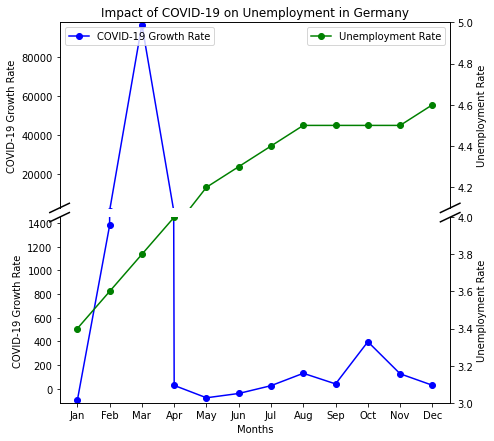

In [363]:
### import numpy as np
import matplotlib.pyplot as plt

#Setting name of month for each number of month
replace_values = {1 : 'Jan', 
                  2 : 'Feb', 
                  3 : 'Mar',
                  4  :  'Apr'  ,
                  5  :  'May'  ,
                  6  :  'Jun'  ,
                  7  :  'Jul'  ,
                  8  :  'Aug'  ,
                  9  :  'Sep'  ,
                  10  :  'Oct'  ,
                  11  :  'Nov'  ,
                  12  :  'Dec'  }                                                                                          
Germany = Germany.replace({"month": replace_values})

# Start with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
fig.subplots_adjust(hspace=0.05)

# ax1 - is the top subplot
# ax2 - is the bottom subplot

# prepare twinned axes
ax3 = ax1.twinx()
ax4 = ax2.twinx()

# set limits for left y-axis
ax1.set_ylim(2800, 98000)  # outliers only
ax2.set_ylim(-120, 1450)  # most of the data

# set limits for right y-axis (twinned)
ax3.set_ylim(4.1, 5)
ax4.set_ylim(3, 4)



# turn off spines
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)

# setup ticks
ax1.tick_params(bottom=False)
ax2.tick_params(bottom=True)

# plotting break diagonals
d = 0.025  # line length 
ax1.plot((-d, +d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax1.plot((1 - d, 1 + d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax2.plot((-d, +d), (1 - d, (1 + d)), c='k', clip_on=False, transform=ax2.transAxes)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), c='k', clip_on=False, transform=ax2.transAxes)


x = Germany['month']
#yleft1 = df_aggregated['PG_Rate']
yleft2 = Germany['PG_Rate']
yright = Germany['Unemployment_Rate_Percent']

#ax1.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')
#ax2.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')

ax1.plot(x, yleft2, c='b', label='COVID-19 Growth Rate',marker='o')
ax2.plot(x, yleft2, c='b', label='COVID-19 Growth Rate',marker='o')

ax3.plot(x, yright, c='g', label='Unemployment Rate', marker='o')
ax4.plot(x, yright, c='g', label='Unemployment Rate', marker='o')

ax1.legend(loc=2)
ax3.legend(loc=1)



ax1.set_title("Impact of COVID-19 on Unemployment in Germany")
ax1.set_ylabel("COVID-19 Growth Rate")
ax2.set_ylabel("COVID-19 Growth Rate")
ax3.set_ylabel("Unemployment Rate")
ax4.set_ylabel("Unemployment Rate")
ax2.set_xlabel("Months")

plt.show()

##### Obseravation
- It is observed that, irrespective of the COVID-19 Growth Rate, Unemployment Rate in Germany kept increasing till August.
- After August not much change was obsreved in Unemployment Rate. However, it increased in Decemeber
- Therefore, Germany's Unemployment Rate can't be considered fully correlated to COVID-19 Rate. 
- For e.g In October, a sudden spike in cases was observed. However, the unemployment rate remained stable.


##### Dealing with Outliers (Germany DataFrame)

In [364]:
Germany=df_MERGED.loc[df_MERGED['location'] == 'Germany']
Germany

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
12,2020,Germany,1,5.0,-99.8,-99.8,3.4
13,2020,Germany,2,74.0,1380.0,1380.0,3.6
14,2020,Germany,3,71729.0,96831.1,96831.1,3.8
15,2020,Germany,4,91201.0,27.1,27.1,4.0
16,2020,Germany,5,20401.0,-77.6,-77.6,4.2
17,2020,Germany,6,12008.0,-41.1,-41.1,4.3
18,2020,Germany,7,14981.0,24.8,24.8,4.4
19,2020,Germany,8,34403.0,129.6,129.6,4.5
20,2020,Germany,9,48111.0,39.8,39.8,4.5
21,2020,Germany,10,238877.0,396.5,396.5,4.5


##### Detecting outliers
In Germany,  month 2 (Feb) and month 3 (March) had highest PG_Rate/COVID-19 Growth Rate than the rest of the months.
These are the major outliers detected.

##### Handling outliers by exclusion 
-  If we consider the outliers in Linear Regression, the slope of the line of regression changes and doesn't give accrurate result
- Moreover, transforming the outliers is also not an option here because the problem still dosen't catered
- Hence we need to drop extreme outliers in Germany for  month 3 (march) and 2 (feb) because the PG_Rate is extreme in these months

In [365]:
#Dropping the outliers
df_Germany_copy = Germany.copy()
df_Germany_copy=df_Germany_copy.drop(df_Germany_copy.index[df_Germany_copy["month"] == 3])
df_Germany_copy=df_Germany_copy.drop(df_Germany_copy.index[df_Germany_copy["month"] == 2])
df_Germany_copy

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
12,2020,Germany,1,5.0,-99.8,-99.8,3.4
15,2020,Germany,4,91201.0,27.1,27.1,4.0
16,2020,Germany,5,20401.0,-77.6,-77.6,4.2
17,2020,Germany,6,12008.0,-41.1,-41.1,4.3
18,2020,Germany,7,14981.0,24.8,24.8,4.4
19,2020,Germany,8,34403.0,129.6,129.6,4.5
20,2020,Germany,9,48111.0,39.8,39.8,4.5
21,2020,Germany,10,238877.0,396.5,396.5,4.5
22,2020,Germany,11,538122.0,125.3,125.3,4.5
23,2020,Germany,12,690608.0,28.3,28.3,4.6


##### 3) Linear Regression :Germany 

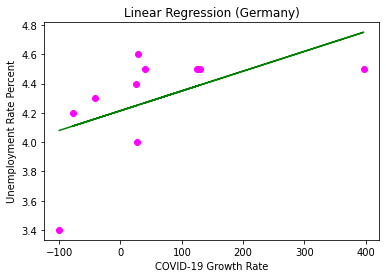

RMSE is 0.28960837090418606
r2 is 0.28252345168711224


In [366]:
#importing python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

# describing dataset
df_Germany_copy.describe()

#X =df_MERGED_copy['Unemployment_Rate_Percent'].values.reshape(-1,1) #reshape() is used to convert from 1-D to 2-D
#y =df_MERGED_copy['PG_Rate'].values.reshape(-1,1)

X =df_Germany_copy['PG_Rate'].values.reshape(-1,1) #reshape() is used to convert from 1-D to 2-D
y =df_Germany_copy['Unemployment_Rate_Percent'].values.reshape(-1,1)

np.any(np.isnan(X))
np.all(np.isfinite(y))

#Calling linear regression function
regressor = LinearRegression()

#Training model using fit()
regressor.fit(X,y)

#Predicting model
y_pred=regressor.predict(X)

#Visualizing the output
plt.scatter(X, y, color = 'magenta')
plt.plot(X, y_pred, color = 'green')
plt.title('Linear Regression (Germany)')
plt.xlabel('COVID-19 Growth Rate')
plt.ylabel('Unemployment Rate Percent')
plt.show()

#Calculating error metric
rmse = np.sqrt(mean_squared_error(y,y_pred))
r2 = r2_score(y,y_pred)
print('RMSE is '+ str(rmse))
print('r2 is '+str(r2))

##### 4) Evaluating the correctness of linear regression in predicting  the unemployment rate for 100 Cases

In [367]:
#Let us predict how much could be the unemploymet rate
#If the PG_Rate (i.e. COVID-19 Growth Rate is 100%)
    
regressor.predict([[100]])


array([[4.35047106]])

In [368]:
#Explanation of how does it predict that for 100% increase in COVID-19 Growth Rate approx 3.81% unemployment rate is observed

#We know that for for every linear equation, there's a slope
# The equation is y = mx + b
# m is the slope/ also called as coefficient

#Checking the value of slope/coefficient (i.e. m)
regressor.coef_

array([[0.00135252]])

In [369]:
#Checking the value of intercept (i.e. b) from equation y = mx + b
regressor.intercept_

array([4.2152193])

In [370]:
#equation in accordance to the linear regression formula
#y = mx + b
#Unemployment_Rate_Percent = m * PG_Rate + b
# Here m = 0.00135252
# x = 100 (Since we wanted to predict for 100)
# b =4.2152193
#mx + b 
#(reg.coef_ * reg.predict([[100]]) + reg.intercept_)
0.00135252*100+4.2152193

4.350471300000001

In [1483]:
# The result is y = 4.350471300000001
# This is equal to what was calulcated by reg.predict([[100]]) = array([[4.35047106]])

##### 5) Polynomial Regression : Germany

r2 is 0.5669984705258561


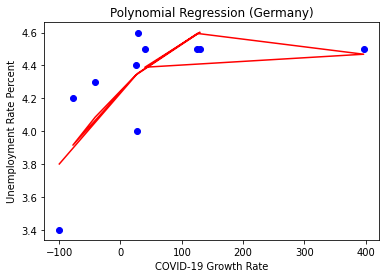

In [371]:
#For polynomial regression you need the class 'PoynomialFeatures' from sklearn.preprocessing
# The class PloynomialFeatures helps in creating polynomial regression based on the linear regression model
# The class is also associated with the preprocessing library

from sklearn.preprocessing import PolynomialFeatures

#creating a PolynomialFeature object from 'PolynomialFeatures' class
# name of the object is : polynom

#degree 2 is the degree of PolynomialFeature
#The more is the degree, the more will the line try to touch all the datapoints on the graph
#The vice versa is true, lesser the degree, lesser the data points touchde
polynom = PolynomialFeatures(degree = 2)
X_polynom = polynom.fit_transform(df_Germany_copy[['PG_Rate']])

#Fit the Polynomial Regression Model
PolyReg = LinearRegression()
PolyReg.fit(X_polynom, df_Germany_copy.Unemployment_Rate_Percent)
y_poly_pred_ger=PolyReg.predict(X_polynom)

plt.title('Polynomial Regression (Germany)')
plt.ylabel('Unemployment Rate Percent')
plt.xlabel('COVID-19 Growth Rate')
plt.scatter(df_Germany_copy.PG_Rate,df_Germany_copy.Unemployment_Rate_Percent,color='blue')
plt.plot(df_Germany_copy.PG_Rate, PolyReg.predict(X_polynom),color='red')

#Calculating error metric
r2 = r2_score(y,y_poly_pred_ger)
print('r2 is '+str(r2))

###### Obseravation
Germany <br>
r2 values:- 
- Linear Regression : 0.28252345168711224 = 0.28 = 28%
- Polynomyial Regression :  0.5669984705258561 = 0.56 = 56% <br>
<br>
- In case of Germany, Linear Regression should be used over Polynomial Regression for further predictions as it is more accurate.
- The slope of the regression line is positive, this means that COVID-19 Growth Rate is directly proportional to Unemployment Rate

##### 6)Predicting the Unemployment Rate % based on fluctuations in COVID-19 Growth Rate % using Linear Regression Vs Polynomial Regression

In [372]:
# Predicting the unemployment rate % if the covid-19 growth rate increases by 100% using Linear Regression
regressor.predict([[100]])


array([[4.35047106]])

In [373]:
# Predicting the unemployment rate % if the covid-19 growth rate by 100% using Polynomial Regression
PolyReg.predict(polynom.fit_transform([[100]]))

array([4.54625055])

##### 7) Scatter graph depicting import & export prices in Germany in 2020

In [374]:
#Displaying the import -export price index & CPI
df_CPI_Import_Export_Aggr=pd.read_csv("CPI_Export_Import_Aggr.csv")
df_CPI_Import_Export_Aggr=df_CPI_Import_Export_Aggr.drop(df_CPI_Import_Export_Aggr.index[df_CPI_Import_Export_Aggr["Year"] == 2019                                                                           ])
df_CPI_Import_Export_Aggr.head()

,Year,Months,import_prices_index,Change on previous month in(%),Change on previous year's month in(%),export_prices_index,Change on previous month in(%).1,Change on previous year's month in(%).1,Consumer price index,Change on previous year's month in(%).2,Change on previous month in(%).2
12,2020,January,101.3,-0.4,-0.9,102.7,0.2,0.5,105.2,1.7,-0.6
13,2020,February,100.4,-0.9,-2,102.6,-0.1,0.3,105.6,1.7,0.4
14,2020,March,96.9,-3.5,-5.5,101.9,-0.7,-0.5,105.7,1.4,0.1
15,2020,April,95.2,-1.8,-7.4,101.5,-0.4,-1.1,106.1,0.9,0.4
16,2020,May,95.5,0.3,-7,101.3,-0.2,-1.2,106.0,0.6,-0.1


In [375]:
# Plotting import price index & export price index
import plotly.express as px
df_CPI_Import_Export_Aggr_copy=df_CPI_Import_Export_Aggr.copy()
fig = px.scatter(df_CPI_Import_Export_Aggr_copy, x="export_prices_index", y="import_prices_index",color="Months",hover_data=['export_prices_index', 'import_prices_index']) 
fig.show()
#print(df_CPI_Import_Export_Aggr_copy)

##### Observation
- The graph depicts the import & export prices in Germany in a given month

##### 8) Combo Chart depicting  COVID-19 Cases's influence on CPI in Germany
- Line : CPI
- Bar : PG_Rate/ COVID-19 Rate
- DataFrame : df_germany

In [376]:
#Extracting CPI, Import price, Export Price from DataFrame 'df_CPI_Import_Export_Aggr' and adding it as a new coulumns in DataFrame 'df_germany'
#Creating df_germany_copy as a duplicate of df_germany
df_germany = Germany.copy()
df_germany['CPI'] = df_CPI_Import_Export_Aggr['Consumer price index']
df_germany['export_price']= df_CPI_Import_Export_Aggr['export_prices_index']
df_germany['import_price']= df_CPI_Import_Export_Aggr['import_prices_index']
df_germany

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent,CPI,export_price,import_price
12,2020,Germany,1,5.0,-99.8,-99.8,3.4,105.2,102.7,101.3
13,2020,Germany,2,74.0,1380.0,1380.0,3.6,105.6,102.6,100.4
14,2020,Germany,3,71729.0,96831.1,96831.1,3.8,105.7,101.9,96.9
15,2020,Germany,4,91201.0,27.1,27.1,4.0,106.1,101.5,95.2
16,2020,Germany,5,20401.0,-77.6,-77.6,4.2,106.0,101.3,95.5
17,2020,Germany,6,12008.0,-41.1,-41.1,4.3,106.6,101.3,96.1
18,2020,Germany,7,14981.0,24.8,24.8,4.4,106.1,101.3,96.4
19,2020,Germany,8,34403.0,129.6,129.6,4.5,106.0,101.2,96.5
20,2020,Germany,9,48111.0,39.8,39.8,4.5,105.8,101.3,96.8
21,2020,Germany,10,238877.0,396.5,396.5,4.5,105.9,101.4,97.1


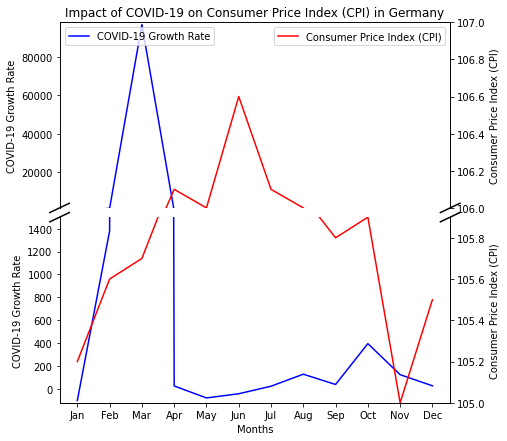

In [377]:
### import numpy as np
import matplotlib.pyplot as plt

#Setting name of month for each number of month
replace_values = {1 : 'Jan', 
                  2 : 'Feb', 
                  3 : 'Mar',
                  4  :  'Apr'  ,
                  5  :  'May'  ,
                  6  :  'Jun'  ,
                  7  :  'Jul'  ,
                  8  :  'Aug'  ,
                  9  :  'Sep'  ,
                  10  :  'Oct'  ,
                  11  :  'Nov'  ,
                  12  :  'Dec'  }                                                                                          
df_germany = df_germany.replace({"month": replace_values})

# Start with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
fig.subplots_adjust(hspace=0.05)

# ax1 - is the top subplot
# ax2 - is the bottom subplot

# prepare twinned axes
ax3 = ax1.twinx()
ax4 = ax2.twinx()

# set limits for left y-axis
ax1.set_ylim(1600, 98000)  # outliers only
ax2.set_ylim(-120, 1500)  # most of the data

# set limits for right y-axis (twinned)
ax3.set_ylim(106, 107)
ax4.set_ylim(105.0, 105.9)



# turn off spines
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)

# setup ticks
ax1.tick_params(bottom=False)
ax2.tick_params(bottom=True)

# plotting break diagonals
d = 0.025  # line length 
ax1.plot((-d, +d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax1.plot((1 - d, 1 + d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax2.plot((-d, +d), (1 - d, (1 + d)), c='k', clip_on=False, transform=ax2.transAxes)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), c='k', clip_on=False, transform=ax2.transAxes)


x =  df_germany['month']
#yleft1 = df_aggregated['PG_Rate']
yleft2 =  df_germany['PG_Rate']
yright = df_germany['CPI']

#ax1.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')
#ax2.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')

ax1.plot(x, yleft2, c='b', label='COVID-19 Growth Rate')
ax2.plot(x, yleft2, c='b', label='COVID-19 Growth Rate')

ax3.plot(x, yright, c='r', label='Consumer Price Index (CPI)')
ax4.plot(x, yright, c='r', label='Consumer Price Index (CPI)')

ax1.legend(loc=2)
ax3.legend(loc=1)



ax1.set_title("Impact of COVID-19 on Consumer Price Index (CPI) in Germany")
ax1.set_ylabel("COVID-19 Growth Rate")
ax2.set_ylabel("COVID-19 Growth Rate")
ax3.set_ylabel("Consumer Price Index (CPI)")
ax4.set_ylabel("Consumer Price Index (CPI)")
ax2.set_xlabel("Months")

plt.show()

##### Observation
- It is observed that both are directly proportional
- As the COVID cases increase, the CPI increases and as the cases decrease, CPI decreases

## China

In [378]:
China=df_aggr_covid19_data.loc[df_aggr_covid19_data['location'] == 'China']
China

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
0,2020,China,1,9254.0,NaN,0.000000,5.3
1,2020,China,2,69554.0,651.610115,651.610115,6.2
2,2020,China,3,2923.0,-95.797510,-95.797510,5.9
3,2020,China,4,1677.0,-42.627438,-42.627438,6.0
4,2020,China,5,190.0,-88.670244,-88.670244,5.9
5,2020,China,6,639.0,236.315789,236.315789,5.7
6,2020,China,7,2870.0,349.139280,349.139280,5.7
7,2020,China,8,2259.0,-21.289199,-21.289199,5.6
8,2020,China,9,631.0,-72.067286,-72.067286,5.4
9,2020,China,10,821.0,30.110935,30.110935,5.3


##### Dealing with outliers


##### Detecting Outliers

In [379]:
df_China_copy = China.copy()

In [380]:
max_threshold =df_China_copy['PG_Rate'].quantile(0.90)
max_threshold


337.85693106004453

In [381]:
min_threshold = df_China_copy['PG_Rate'].quantile(0.10)
min_threshold


-87.00994867676977

In [382]:
df_China_copy[df_China_copy['PG_Rate']>max_threshold]


,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
1,2020,China,2,69554.0,651.610115,651.610115,6.2
6,2020,China,7,2870.0,349.139280,349.139280,5.7


In [383]:
df_China_copy[df_China_copy['PG_Rate']< min_threshold]


,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
2,2020,China,3,2923.0,-95.797510,-95.797510,5.9
4,2020,China,5,190.0,-88.670244,-88.670244,5.9


##### Handling Outliers

In [384]:
col_PG_Rate = ['PG_Rate']
col_PG_Rate

['PG_Rate']

In [385]:
#Using the Capping Percentile Method
def percentile_capping(df, cols, from_low_end, from_high_end):
    for col in cols:

        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)

In [386]:
percentile_capping(df_China_copy, col_PG_Rate, 0.10, 0.10)

In [387]:
#Initial Max Min Values 
China.describe()

,year,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
count,12.0,12.000000,12.000000,11.000000,12.000000,12.000000
mean,2020.0,6.500000,7951.250000,103.008837,94.424768,5.616667
std,0.0,3.605551,19546.375605,229.885218,221.194838,0.337998
min,2020.0,1.000000,190.000000,-95.797510,-95.797510,5.200000
25%,2020.0,3.750000,775.500000,-57.347362,-49.987400,5.300000
50%,2020.0,6.500000,1968.000000,30.110935,15.055468,5.650000
75%,2020.0,9.250000,2957.500000,167.799822,133.541838,5.900000
max,2020.0,12.000000,69554.000000,651.610115,651.610115,6.200000


In [388]:
#Max Min Values after transformation
df_China_copy.describe()

,year,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
count,12.0,12.000000,12.000000,11.000000,12.000000,12.000000
mean,2020.0,6.500000,7951.250000,103.008837,69.812804,5.616667
std,0.0,3.605551,19546.375605,229.885218,160.310203,0.337998
min,2020.0,1.000000,190.000000,-95.797510,-88.670244,5.200000
25%,2020.0,3.750000,775.500000,-57.347362,-49.987400,5.300000
50%,2020.0,6.500000,1968.000000,30.110935,15.055468,5.650000
75%,2020.0,9.250000,2957.500000,167.799822,133.541838,5.900000
max,2020.0,12.000000,69554.000000,651.610115,349.139280,6.200000


##### 1) Unemployment Rate (Monthly Basis): Bar graph representing the Unemployment Rate on Monthly Basis in China
##### 2) COVID-19 Growth Rate (Monthly Basis): Bar graph representing the  COVID-19 Growth Rate on Monthly Basis in China


<AxesSubplot:title={'center':'Unemployment Rate in China'}, xlabel='month', ylabel='Unemployment Rate '>

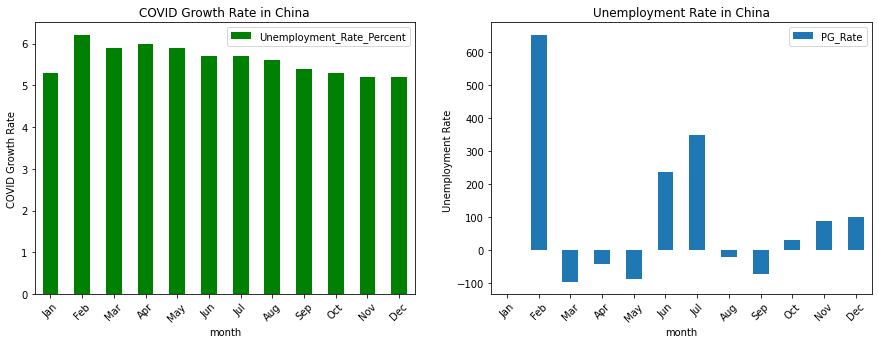

In [389]:
fig = plt.figure()
fig.set_figheight(5)
fig.set_figwidth(15)

#Setting name of month for each number of month
replace_values = {1 : 'Jan', 
                  2 : 'Feb', 
                  3 : 'Mar',
                  4  :  'Apr'  ,
                  5  :  'May'  ,
                  6  :  'Jun'  ,
                  7  :  'Jul'  ,
                  8  :  'Aug'  ,
                  9  :  'Sep'  ,
                  10  :  'Oct'  ,
                  11  :  'Nov'  ,
                  12  :  'Dec'  }                                                                                          
China = China.replace({"month": replace_values})

# Divide the figure into a 1x2 grid, and give me the first section
ax1 = fig.add_subplot(121) 
plt.xlabel("Months")
#131
#fig.tight_layout(pad=50.0)
ax1.set_ylabel("COVID Growth Rate")
ax1.set_xlabel("Months")
ax1.set_title("COVID Growth Rate in China")

# Divide the figure into a 1x2 grid, and give me the second section
ax2 = fig.add_subplot(122)
#132
ax2.set_ylabel("Unemployment Rate ")
ax2.set_xlabel("Months")
ax2.set_title("Unemployment Rate in China")


China.plot.bar(x='month', y='Unemployment_Rate_Percent',rot=45 ,ax=ax1 , color='green')
China.plot.bar(x='month', y='PG_Rate',rot=45 ,ax=ax2)

#df.groupby('country').plot(x='year', y='unemployment', ax=ax1, legend=False)
#df.groupby('country')['unemployment'].mean().sort_values().plot(kind='barh', ax=ax2)

##### Observation
- The highest COVID Growth Rate was observed in February and similary, the unemployment rate was highest in Feb in China
- However, we can't conclude a direct correlation between the COVID Growth Rate & Unemployment Rate in China because there exists fluctuations in Unemployment Rate, irrespective of the COVID-19 Growth Rate

##### 3) Linear Regression : China

r2 is 0.12354706752612732


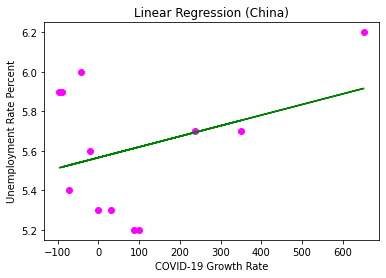

In [390]:
#importing python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score


# describing dataset
China.describe()
y =China['Unemployment_Rate_Percent'].values.reshape(-1,1) #reshape() is used to convert from 1-D to 2-D
X =China['PG_Rate'].values.reshape(-1,1)

#np.any(np.isnan(X))
#np.all(np.isfinite(y))

#Calling linear regression function
regressor = LinearRegression()

#Training model using fit()
regressor.fit(X,y)

#Predicting model
y_pred=regressor.predict(X)

#Visualizing the output
plt.scatter(X, y, color = 'magenta')
plt.plot(X, y_pred, color = 'green')
plt.title('Linear Regression (China)')
plt.ylabel('Unemployment Rate Percent')
plt.xlabel('COVID-19 Growth Rate')

#Calculating error metric

r2 = r2_score(y,y_pred)
print('r2 is '+str(r2))


plt.show()

###### 4) Polynomial Regression : China

r2 is 0.5002586455358757


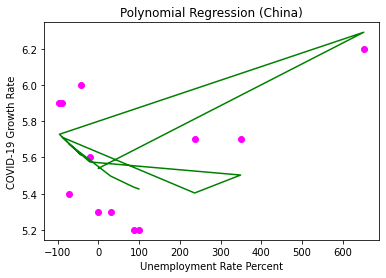

In [391]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

#dataset.describe() # describing dataset
China.describe()

#X =df_MERGED['PG_Rate(-1,1) #reshape() is used to convert from 1-D to 2-D
X =China['PG_Rate'].values.reshape(-1,1)
y =China['Unemployment_Rate_Percent'].values.reshape(-1,1)

#Converting input feature into their higher order
poly=PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly,y)
y_poly_pred=regressor.predict(X_poly)

#Visualizing output
plt.scatter(X,y, color = 'magenta')
plt.plot(X, y_poly_pred, color = 'Green')
plt.title('Polynomial Regression (China)')
plt.xlabel('Unemployment Rate Percent')
plt.ylabel('COVID-19 Growth Rate')

#Calculating error metric
r2 = r2_score(y,y_poly_pred)
print('r2 is '+str(r2))

plt.show()

##### Obseravtion
China <br>
r2 values:- 
- Linear Regression : 0.12354706752612732 = 0.12 = 12%
- Polynomyial Regression :  0.5002586455358757 = 0.50 = 50% <br>
In case of China, Polynomial Regression should be used over Linear Regression for further predictions as it is more accurate.<br>
The slope of the line of regression is positive, meaning that Unemployment Rate and COVID-19 Growth Rate are directly proportional. <br>
Therefore, as the COVID Cases increases, unemployment increases and as there's decline in COVID-19 Growth Rate, Unemployment decreases. <br>
This is because China has maximum manufacturing firm and high labour work. These work can't be handled remotely and therefore lockdown due to increase in COVID-19 cases results in increase in unemployment



##### 5)Broken Line Chart depicting unemployment rate Vs COVID-19 Growth Rate in China

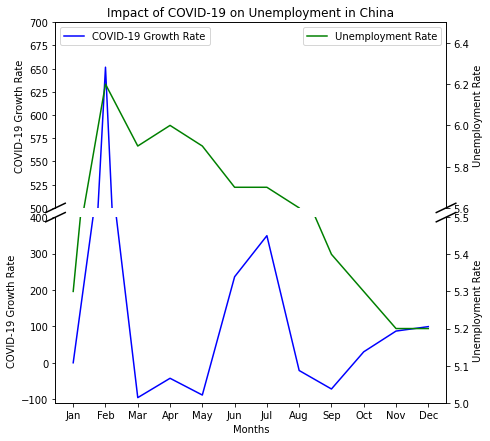

In [392]:
### import numpy as np
import matplotlib.pyplot as plt

#Setting name of month for each number of month
replace_values = {1 : 'Jan', 
                  2 : 'Feb', 
                  3 : 'Mar',
                  4  :  'Apr'  ,
                  5  :  'May'  ,
                  6  :  'Jun'  ,
                  7  :  'Jul'  ,
                  8  :  'Aug'  ,
                  9  :  'Sep'  ,
                  10  :  'Oct'  ,
                  11  :  'Nov'  ,
                  12  :  'Dec'  }                                                                                          
China = China.replace({"month": replace_values})

# Start with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
fig.subplots_adjust(hspace=0.05)

# ax1 - is the top subplot
# ax2 - is the bottom subplot

# prepare twinned axes
ax3 = ax1.twinx()
ax4 = ax2.twinx()

# set limits for left y-axis
ax1.set_ylim(500, 700)  # outliers only
ax2.set_ylim(-110, 400)  # most of the data

# set limits for right y-axis (twinned)
ax3.set_ylim(5.6, 6.5)
ax4.set_ylim(5, 5.5)



# turn off spines
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)

# setup ticks
ax1.tick_params(bottom=False)
ax2.tick_params(bottom=True)

# plotting break diagonals
d = 0.025  # line length 
ax1.plot((-d, +d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax1.plot((1 - d, 1 + d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax2.plot((-d, +d), (1 - d, (1 + d)), c='k', clip_on=False, transform=ax2.transAxes)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), c='k', clip_on=False, transform=ax2.transAxes)


x = China['month']
#yleft1 = df_aggregated['PG_Rate']
yleft2 = China['PG_Rate']
yright = China['Unemployment_Rate_Percent']

#ax1.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')
#ax2.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')

ax1.plot(x, yleft2, c='b', label='COVID-19 Growth Rate')
ax2.plot(x, yleft2, c='b', label='COVID-19 Growth Rate')

ax3.plot(x, yright, c='g', label='Unemployment Rate')
ax4.plot(x, yright, c='g', label='Unemployment Rate')

ax1.legend(loc=2)
ax3.legend(loc=1)



ax1.set_title("Impact of COVID-19 on Unemployment in China")
ax1.set_ylabel("COVID-19 Growth Rate")
ax2.set_ylabel("COVID-19 Growth Rate")
ax3.set_ylabel("Unemployment Rate")
ax4.set_ylabel("Unemployment Rate")
ax2.set_xlabel("Months")

plt.show()

##### Observation
- A direct correlation between COVID-19 Cases and Unemployment was obsreved till May, i.e. Increase/Decrease in COVID-19 Cases resulted in incerease/decrease in unemployment.


# India

In [393]:
India=df_MERGED.loc[df_MERGED['location'] == 'India']
India


,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
24,2020,India,1,1.0,-100.0,-100.0,7.2
25,2020,India,2,2.0,100.0,100.0,7.8
26,2020,India,3,1394.0,69600.0,69600.0,8.8
27,2020,India,4,33466.0,2300.7,2300.7,23.5
28,2020,India,5,155746.0,365.4,365.4,21.7
29,2020,India,6,394872.0,153.5,153.5,10.2
30,2020,India,7,1110507.0,181.2,181.2,7.4
31,2020,India,8,1995178.0,79.7,79.7,8.4
32,2020,India,9,2621418.0,31.4,31.4,6.7
33,2020,India,10,1871498.0,-28.6,-28.6,7.0


 ##### 1) Broken Line Chart depicting Impact of COVID-19 on Unemployment Rate in India
- Two Y-Axis
- DataFarme = India

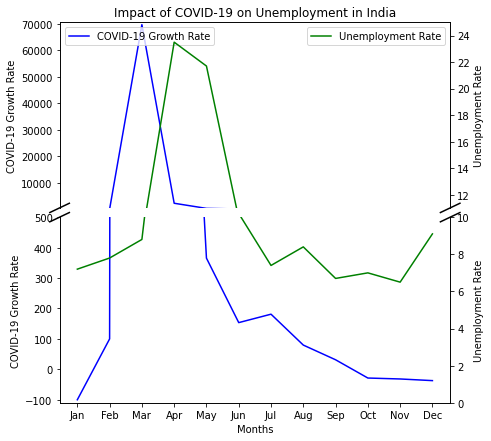

In [394]:
### import numpy as np
import matplotlib.pyplot as plt

#Setting name of month for each number of month
replace_values = {1 : 'Jan', 
                  2 : 'Feb', 
                  3 : 'Mar',
                  4  :  'Apr'  ,
                  5  :  'May'  ,
                  6  :  'Jun'  ,
                  7  :  'Jul'  ,
                  8  :  'Aug'  ,
                  9  :  'Sep'  ,
                  10  :  'Oct'  ,
                  11  :  'Nov'  ,
                  12  :  'Dec'  }                                                                                          
India = India.replace({"month": replace_values})

# Start with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
fig.subplots_adjust(hspace=0.05)

# ax1 - is the top subplot
# ax2 - is the bottom subplot

# prepare twinned axes
ax3 = ax1.twinx()
ax4 = ax2.twinx()

# set limits for left y-axis
ax1.set_ylim(550, 70500)  # outliers only
ax2.set_ylim(-110, 500)  # most of the data

# set limits for right y-axis (twinned)
ax3.set_ylim(11, 25)
ax4.set_ylim(0, 10)



# turn off spines
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)

# setup ticks
ax1.tick_params(bottom=False)
ax2.tick_params(bottom=True)

# plotting break diagonals
d = 0.025  # line length 
ax1.plot((-d, +d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax1.plot((1 - d, 1 + d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax2.plot((-d, +d), (1 - d, (1 + d)), c='k', clip_on=False, transform=ax2.transAxes)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), c='k', clip_on=False, transform=ax2.transAxes)


x = India['month']
#yleft1 = df_aggregated['PG_Rate']
yleft2 = India['PG_Rate']
yright = India['Unemployment_Rate_Percent']

#ax1.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')
#ax2.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')

ax1.plot(x, yleft2, c='b', label='COVID-19 Growth Rate')
ax2.plot(x, yleft2, c='b', label='COVID-19 Growth Rate')

ax3.plot(x, yright, c='g', label='Unemployment Rate')
ax4.plot(x, yright, c='g', label='Unemployment Rate')

ax1.legend(loc=2)
ax3.legend(loc=1)



ax1.set_title("Impact of COVID-19 on Unemployment in India")
ax1.set_ylabel("COVID-19 Growth Rate")
ax2.set_ylabel("COVID-19 Growth Rate")
ax3.set_ylabel("Unemployment Rate")
ax4.set_ylabel("Unemployment Rate")
ax2.set_xlabel("Months")

plt.show()

##### Observation
- On average, a direct correlation between the COVID-19 Rate and Unemployment Rate can be observed in India

##### 2) Linear Regression (India)

##### Handling Outliers

In [396]:
df_India_copy = India.copy()
df_India_copy

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
24,2020,India,Jan,1.0,-100.0,-100.0,7.2
25,2020,India,Feb,2.0,100.0,100.0,7.8
26,2020,India,Mar,1394.0,69600.0,69600.0,8.8
27,2020,India,Apr,33466.0,2300.7,2300.7,23.5
28,2020,India,May,155746.0,365.4,365.4,21.7
29,2020,India,Jun,394872.0,153.5,153.5,10.2
30,2020,India,Jul,1110507.0,181.2,181.2,7.4
31,2020,India,Aug,1995178.0,79.7,79.7,8.4
32,2020,India,Sep,2621418.0,31.4,31.4,6.7
33,2020,India,Oct,1871498.0,-28.6,-28.6,7.0


###### Detecting Outliers

In India, month 3 (March) had highest PG_Rate/COVID-19 Growth Rate than the rest of the months. This is the major outlier detected.



##### Handling outliers by exclusion 
-  If we consider the outliers in Linear Regression, the slope of the line of regression changes and doesn't give accrurate result
- Moreover, transforming the outliers is also not an option here because the problem still dosen't catered
- Hence we need to drop extreme outliers in India for  month 3 (march)  because the PG_Rate is extreme in this month

In [397]:
#Dropping the outliers
df_India_copy = India.copy()
df_India_copy=df_India_copy.drop(df_India_copy.index[df_India_copy["month"] == 'Mar'])
df_India_copy

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
24,2020,India,Jan,1.0,-100.0,-100.0,7.2
25,2020,India,Feb,2.0,100.0,100.0,7.8
27,2020,India,Apr,33466.0,2300.7,2300.7,23.5
28,2020,India,May,155746.0,365.4,365.4,21.7
29,2020,India,Jun,394872.0,153.5,153.5,10.2
30,2020,India,Jul,1110507.0,181.2,181.2,7.4
31,2020,India,Aug,1995178.0,79.7,79.7,8.4
32,2020,India,Sep,2621418.0,31.4,31.4,6.7
33,2020,India,Oct,1871498.0,-28.6,-28.6,7.0
34,2020,India,Nov,1278727.0,-31.7,-31.7,6.5


r2 is 0.6425721850813537


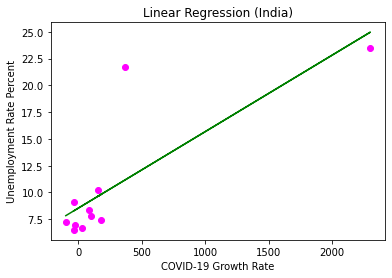

In [398]:
#importing python library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression

from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score


# describing dataset
df_India_copy.describe()
y =df_India_copy['Unemployment_Rate_Percent'].values.reshape(-1,1) #reshape() is used to convert from 1-D to 2-D
X=df_India_copy['PG_Rate'].values.reshape(-1,1)

#np.any(np.isnan(X))
#np.all(np.isfinite(y))

#Calling linear regression function
regressor = LinearRegression()

#Training model using fit()
regressor.fit(X,y)

#Predicting model
y_pred=regressor.predict(X)

#Visualizing the output
plt.scatter(X, y, color = 'magenta')
plt.plot(X, y_pred, color = 'green')
plt.title('Linear Regression (India)')
plt.ylabel('Unemployment Rate Percent')
plt.xlabel('COVID-19 Growth Rate')

y_pred=regressor.predict(X)
r2 = r2_score(y,y_pred)
print('r2 is '+str(r2))

plt.show()

##### 3) Polynomial Regression (India)

r2 is 0.7941413844064005


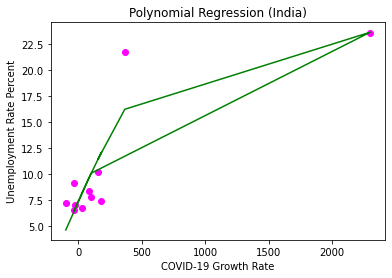

In [399]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

#dataset.describe() # describing dataset
df_India_copy.describe()

#X =df_MERGED['PG_Rate(-1,1) #reshape() is used to convert from 1-D to 2-D
y =df_India_copy['Unemployment_Rate_Percent'].values.reshape(-1,1)
X =df_India_copy['PG_Rate'].values.reshape(-1,1)

#Converting input feature into their higher order
poly=PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly,y)
y_poly_pred=regressor.predict(X_poly)

#Visualizing output
plt.scatter(X,y, color = 'magenta')
plt.plot(X, y_poly_pred, color = 'Green')
plt.title('Polynomial Regression (India)')
plt.ylabel('Unemployment Rate Percent')
plt.xlabel('COVID-19 Growth Rate')


r2 = r2_score(y,y_poly_pred)
print('r2 is '+str(r2))


plt.show()

##### Obseravtion
India <br>
r2 values:- 
- Linear Regression :  0.6425721850813537 = 0.64 = 64%
- Polynomyial Regression :   0.7941413844064005 = 0.79 = 79% <br>
In case of India, Polynomial Regression should be used over Linear Regression for further predictions as it is more accurate <br>
The slope of the line of regression is positive, meaning that Unemployment Rate and COVID-19 Growth Rate are directly proportional.<br>
Therefore, as the COVID Cases increases, unemployment increases and as there's decline in COVID-19 Growth Rate, Unemployment decreases.<br>

## United Kingdom

In [400]:
UK=df_MERGED.loc[df_MERGED['location'] == 'United Kingdom']
UK


,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
48,2020,United Kingdom,1,2.0,-100.0,-100.0,4.0
49,2020,United Kingdom,2,59.0,2850.0,2850.0,4.0
50,2020,United Kingdom,3,38754.0,65584.7,65584.7,4.0
51,2020,United Kingdom,4,139956.0,261.1,261.1,4.0
52,2020,United Kingdom,5,78768.0,-43.7,-43.7,4.1
53,2020,United Kingdom,6,27677.0,-64.9,-64.9,4.1
54,2020,United Kingdom,7,19577.0,-29.3,-29.3,4.3
55,2020,United Kingdom,8,33290.0,70.0,70.0,4.5
56,2020,United Kingdom,9,117763.0,253.7,253.7,4.8
57,2020,United Kingdom,10,558947.0,374.6,374.6,5.1


###### 1) Broken Line Chart depicting Impact of COVID-19 on Unemployment Rate in UK

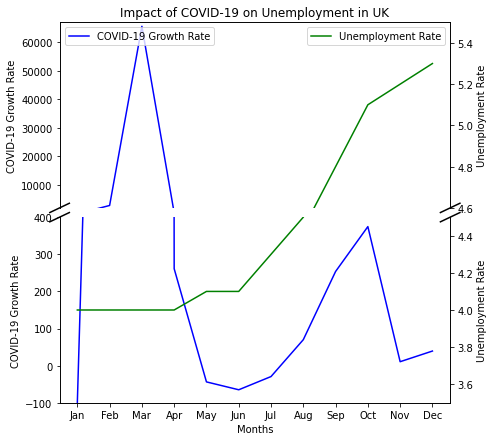

In [401]:
### import numpy as np
import matplotlib.pyplot as plt

#Setting name of month for each number of month
replace_values = {1 : 'Jan', 
                  2 : 'Feb', 
                  3 : 'Mar',
                  4  :  'Apr'  ,
                  5  :  'May'  ,
                  6  :  'Jun'  ,
                  7  :  'Jul'  ,
                  8  :  'Aug'  ,
                  9  :  'Sep'  ,
                  10  :  'Oct'  ,
                  11  :  'Nov'  ,
                  12  :  'Dec'  }                                                                                          
UK = UK.replace({"month": replace_values})

# Start with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
fig.subplots_adjust(hspace=0.05)

# ax1 - is the top subplot
# ax2 - is the bottom subplot

# prepare twinned axes
ax3 = ax1.twinx()
ax4 = ax2.twinx()

# set limits for left y-axis
ax1.set_ylim(2000, 67000)  # outliers only
ax2.set_ylim(-100, 400)  # most of the data

# set limits for right y-axis (twinned)
ax3.set_ylim(4.6, 5.5)
ax4.set_ylim(3.5, 4.5)



# turn off spines
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)

# setup ticks
ax1.tick_params(bottom=False)
ax2.tick_params(bottom=True)

# plotting break diagonals
d = 0.025  # line length 
ax1.plot((-d, +d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax1.plot((1 - d, 1 + d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax2.plot((-d, +d), (1 - d, (1 + d)), c='k', clip_on=False, transform=ax2.transAxes)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), c='k', clip_on=False, transform=ax2.transAxes)


x = UK['month']
#yleft1 = df_aggregated['PG_Rate']
yleft2 = UK['PG_Rate']
yright = UK['Unemployment_Rate_Percent']

#ax1.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')
#ax2.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')

ax1.plot(x, yleft2, c='b', label='COVID-19 Growth Rate')
ax2.plot(x, yleft2, c='b', label='COVID-19 Growth Rate')

ax3.plot(x, yright, c='g', label='Unemployment Rate')
ax4.plot(x, yright, c='g', label='Unemployment Rate')

ax1.legend(loc=2)
ax3.legend(loc=1)



ax1.set_title("Impact of COVID-19 on Unemployment in UK")
ax1.set_ylabel("COVID-19 Growth Rate")
ax2.set_ylabel("COVID-19 Growth Rate")
ax3.set_ylabel("Unemployment Rate")
ax4.set_ylabel("Unemployment Rate")
ax2.set_xlabel("Months")

plt.show()

##### Observation
- The unemployment rate has an upward trend.
- There was decrease from April to June in COVID-19 Growth Rate but it increased in susequent months

##### Handling Outliers 

##### Detecting Outliers

In [402]:
UK

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
48,2020,United Kingdom,Jan,2.0,-100.0,-100.0,4.0
49,2020,United Kingdom,Feb,59.0,2850.0,2850.0,4.0
50,2020,United Kingdom,Mar,38754.0,65584.7,65584.7,4.0
51,2020,United Kingdom,Apr,139956.0,261.1,261.1,4.0
52,2020,United Kingdom,May,78768.0,-43.7,-43.7,4.1
53,2020,United Kingdom,Jun,27677.0,-64.9,-64.9,4.1
54,2020,United Kingdom,Jul,19577.0,-29.3,-29.3,4.3
55,2020,United Kingdom,Aug,33290.0,70.0,70.0,4.5
56,2020,United Kingdom,Sep,117763.0,253.7,253.7,4.8
57,2020,United Kingdom,Oct,558947.0,374.6,374.6,5.1


##### Detecting outliers
In UK, month 2 (Feb) and month 3 (March) had highest PG_Rate/COVID-19 Growth Rate than the rest of the months. These are the major outliers detected.


##### Handling outliers by exclusion 
-  If we consider the outliers in Linear Regression, the slope of the line of regression changes and doesn't give accrurate result
- Moreover, transforming the outliers is also not an option here because the problem still dosen't catered
- Hence we need to drop extreme outliers in UK for  month 3 (march) and 2 (feb) because the PG_Rate is extreme in these months

In [403]:
#Dropping the outliers
df_UK_copy = UK.copy()
df_UK_copy=df_UK_copy.drop(df_UK_copy.index[df_UK_copy["month"] == 'Mar'])
df_UK_copy=df_UK_copy.drop(df_UK_copy.index[df_UK_copy["month"] == 'Feb'])
df_UK_copy

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
48,2020,United Kingdom,Jan,2.0,-100.0,-100.0,4.0
51,2020,United Kingdom,Apr,139956.0,261.1,261.1,4.0
52,2020,United Kingdom,May,78768.0,-43.7,-43.7,4.1
53,2020,United Kingdom,Jun,27677.0,-64.9,-64.9,4.1
54,2020,United Kingdom,Jul,19577.0,-29.3,-29.3,4.3
55,2020,United Kingdom,Aug,33290.0,70.0,70.0,4.5
56,2020,United Kingdom,Sep,117763.0,253.7,253.7,4.8
57,2020,United Kingdom,Oct,558947.0,374.6,374.6,5.1
58,2020,United Kingdom,Nov,618940.0,10.7,10.7,5.2
59,2020,United Kingdom,Dec,862498.0,39.4,39.4,5.3


##### 2) Linear Regression (UK)

r2 is 0.1343726905000846


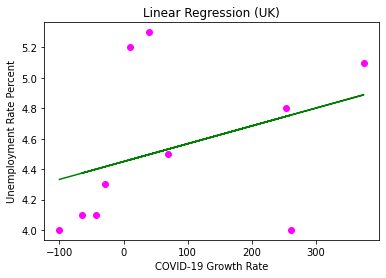

In [404]:
y =df_UK_copy['Unemployment_Rate_Percent'].values.reshape(-1,1) #reshape() is used to convert from 1-D to 2-D
X=df_UK_copy['PG_Rate'].values.reshape(-1,1)

#Calling linear regression function
regressor = LinearRegression()

#Training model using fit()
regressor.fit(X,y)

#Predicting model
y_pred=regressor.predict(X)

#Visualizing the output
plt.scatter(X, y, color = 'magenta')
plt.plot(X, y_pred, color = 'green')
plt.title('Linear Regression (UK)')
plt.ylabel('Unemployment Rate Percent')
plt.xlabel('COVID-19 Growth Rate')

y_pred=regressor.predict(X)
r2 = r2_score(y,y_pred)
print('r2 is '+str(r2))

plt.show()

##### 3) Polynomial Regression (UK)

r2 is 0.19988541038246954


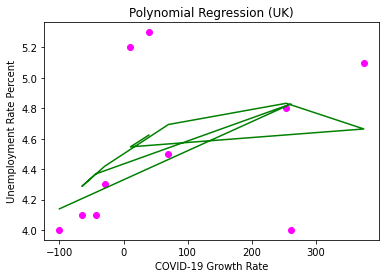

In [405]:
#X =df_MERGED['PG_Rate(-1,1) #reshape() is used to convert from 1-D to 2-D
y =df_UK_copy['Unemployment_Rate_Percent'].values.reshape(-1,1)
X =df_UK_copy['PG_Rate'].values.reshape(-1,1)

#Converting input feature into their higher order
poly=PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly,y)
y_poly_pred=regressor.predict(X_poly)

#Visualizing output
plt.scatter(X,y, color = 'magenta')
plt.plot(X, y_poly_pred, color = 'Green')
plt.title('Polynomial Regression (UK)')
plt.ylabel('Unemployment Rate Percent')
plt.xlabel('COVID-19 Growth Rate')


r2 = r2_score(y,y_poly_pred)
print('r2 is '+str(r2))


plt.show()

##### Obseravation
UK <br>
r2 values:- 
- Linear Regression :0.1343726905000846 = 0.13 = 13%
- Polynomyial Regression :  0.19988541038246954 = 0.19 = 19% <br>
<br>
- In case of UK, Linear Regression should be used over Polynomial Regression for further predictions as it is more accurate.
- The slope of the regression line is positive, this means that COVID-19 Growth Rate is directly proportional to Unemployment Rate
- Increase in COVID-19 Cases result in increase in unemployment rate and  vice versa


## United States

In [406]:
USA=df_MERGED.loc[df_MERGED['location'] == 'United States']
USA

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
60,2020,United States,1,7.0,-100.0,-100.0,3.5
61,2020,United States,2,17.0,142.9,142.9,3.5
62,2020,United States,3,192152.0,1130205.9,1130205.9,4.4
63,2020,United States,4,888708.0,362.5,362.5,14.8
64,2020,United States,5,717846.0,-19.2,-19.2,13.3
65,2020,United States,6,843041.0,17.4,17.4,11.1
66,2020,United States,7,1924684.0,128.3,128.3,10.2
67,2020,United States,8,1458899.0,-24.2,-24.2,8.4
68,2020,United States,9,1206247.0,-17.3,-17.3,7.8
69,2020,United States,10,1926777.0,59.7,59.7,6.9


##### Handling Outliers

In USA, the PG_Rate/ COVID-19 Growth Rate was seen highest in March. <br>
This is an extreme outlier that has to be dealt with before plotting any graphs. <br>
Since there is only one outlier, we decide to exclude the outlier.

In [407]:
USA=USA.drop(USA.index[USA["month"] == 3])
USA

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
60,2020,United States,1,7.0,-100.0,-100.0,3.5
61,2020,United States,2,17.0,142.9,142.9,3.5
63,2020,United States,4,888708.0,362.5,362.5,14.8
64,2020,United States,5,717846.0,-19.2,-19.2,13.3
65,2020,United States,6,843041.0,17.4,17.4,11.1
66,2020,United States,7,1924684.0,128.3,128.3,10.2
67,2020,United States,8,1458899.0,-24.2,-24.2,8.4
68,2020,United States,9,1206247.0,-17.3,-17.3,7.8
69,2020,United States,10,1926777.0,59.7,59.7,6.9
70,2020,United States,11,4496140.0,133.4,133.4,6.7


###### 1) Broken Line Chart depicting Impact of COVID-19 on Unemployment Rate in USA 

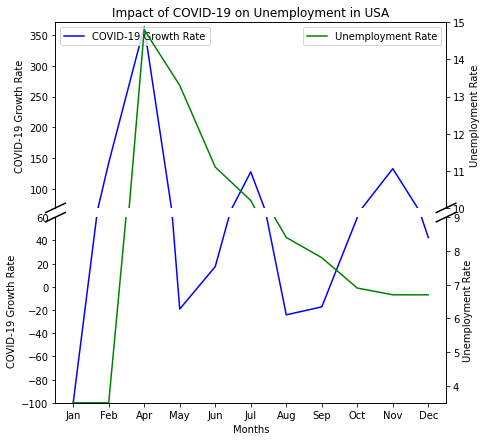

In [408]:
### import numpy as np
import matplotlib.pyplot as plt

#Setting name of month for each number of month
replace_values = {1 : 'Jan', 
                  2 : 'Feb', 
                  3 : 'Mar',
                  4  :  'Apr'  ,
                  5  :  'May'  ,
                  6  :  'Jun'  ,
                  7  :  'Jul'  ,
                  8  :  'Aug'  ,
                  9  :  'Sep'  ,
                  10  :  'Oct'  ,
                  11  :  'Nov'  ,
                  12  :  'Dec'  }                                                                                          
USA = USA.replace({"month": replace_values})

# Start with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
fig.subplots_adjust(hspace=0.05)

# ax1 - is the top subplot
# ax2 - is the bottom subplot

# prepare twinned axes
ax3 = ax1.twinx()
ax4 = ax2.twinx()

# set limits for left y-axis
ax1.set_ylim(70, 370)  # outliers only
ax2.set_ylim(-100, 60)  # most of the data

# set limits for right y-axis (twinned)
ax3.set_ylim(10.0, 15.0)
ax4.set_ylim(3.5, 9.0)



# turn off spines
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)

# setup ticks
ax1.tick_params(bottom=False)
ax2.tick_params(bottom=True)

# plotting break diagonals
d = 0.025  # line length 
ax1.plot((-d, +d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax1.plot((1 - d, 1 + d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax2.plot((-d, +d), (1 - d, (1 + d)), c='k', clip_on=False, transform=ax2.transAxes)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), c='k', clip_on=False, transform=ax2.transAxes)


x = USA['month']
#yleft1 = df_aggregated['PG_Rate']
yleft2 = USA['PG_Rate']
yright = USA['Unemployment_Rate_Percent']

#ax1.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')
#ax2.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')

ax1.plot(x, yleft2, c='b', label='COVID-19 Growth Rate')
ax2.plot(x, yleft2, c='b', label='COVID-19 Growth Rate')

ax3.plot(x, yright, c='g', label='Unemployment Rate')
ax4.plot(x, yright, c='g', label='Unemployment Rate')

ax1.legend(loc=2)
ax3.legend(loc=1)



ax1.set_title("Impact of COVID-19 on Unemployment in USA")
ax1.set_ylabel("COVID-19 Growth Rate")
ax2.set_ylabel("COVID-19 Growth Rate")
ax3.set_ylabel("Unemployment Rate")
ax4.set_ylabel("Unemployment Rate")
ax2.set_xlabel("Months")

plt.show()

##### Observation
- It is observed that the Unemployment Rate has a downward trend, while there has been fluctuations in COVID-19 Growth Rate

##### 2) Linear Regression (USA)

r2 is 0.1732368995471285


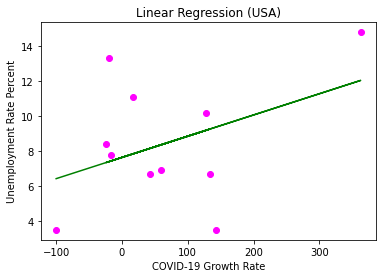

In [409]:
y =USA['Unemployment_Rate_Percent'].values.reshape(-1,1) #reshape() is used to convert from 1-D to 2-D
X=USA['PG_Rate'].values.reshape(-1,1)

#Calling linear regression function
regressor = LinearRegression()

#Training model using fit()
regressor.fit(X,y)

#Predicting model
y_pred=regressor.predict(X)

#Visualizing the output
plt.scatter(X, y, color = 'magenta')
plt.plot(X, y_pred, color = 'green')
plt.title('Linear Regression (USA)')
plt.ylabel('Unemployment Rate Percent')
plt.xlabel('COVID-19 Growth Rate')

y_pred=regressor.predict(X)
r2 = r2_score(y,y_pred)
print('r2 is '+str(r2))

plt.show()

r2 is 0.2367271472545891


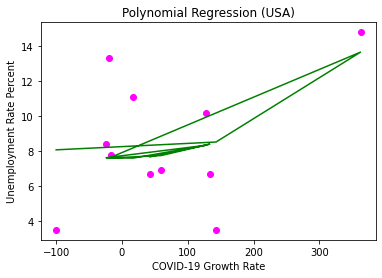

In [410]:
#X =df_MERGED['PG_Rate(-1,1) #reshape() is used to convert from 1-D to 2-D
y =USA['Unemployment_Rate_Percent'].values.reshape(-1,1)
X =USA['PG_Rate'].values.reshape(-1,1)

#Converting input feature into their higher order
poly=PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly,y)
y_poly_pred=regressor.predict(X_poly)

#Visualizing output
plt.scatter(X,y, color = 'magenta')
plt.plot(X, y_poly_pred, color = 'Green')
plt.title('Polynomial Regression (USA)')
plt.ylabel('Unemployment Rate Percent')
plt.xlabel('COVID-19 Growth Rate')


r2 = r2_score(y,y_poly_pred)
print('r2 is '+str(r2))


plt.show()

##### Obseravation
USA <br>
r2 values:-

- Linear Regression : 0.1732368995471285 = 0.17 = 17%
- Polynomyial Regression : 0.2367271472545891 = 0.23 = 23% <br>
In case of USA, Polynomial Regression should be used over Linear Regression for further predictions as it is more accurate
The slope of the line of regression is positive, meaning that Unemployment Rate and COVID-19 Growth Rate are directly proportional.
Therefore, as the COVID Cases increases, unemployment increases and as there's decline in COVID-19 Growth Rate, Unemployment decreases.

## Italy

In [411]:
Italy=df_MERGED.loc[df_MERGED['location'] == 'Italy']
Italy

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
36,2020,Italy,1,2.0,-100.0,-100.0,9.6
37,2020,Italy,2,1126.0,56200.0,56200.0,9.4
38,2020,Italy,3,104664.0,9195.2,9195.2,8.5
39,2020,Italy,4,99671.0,-4.8,-4.8,7.4
40,2020,Italy,5,27534.0,-72.4,-72.4,8.7
41,2020,Italy,6,7581.0,-72.5,-72.5,9.3
42,2020,Italy,7,6959.0,-8.2,-8.2,9.8
43,2020,Italy,8,21677.0,211.5,211.5,9.7
44,2020,Italy,9,45647.0,110.6,110.6,9.5
45,2020,Italy,10,364569.0,698.7,698.7,9.5


##### 1) Broken Line Chart depicting Impact of COVID-19 on Unemployment Rate in Italy

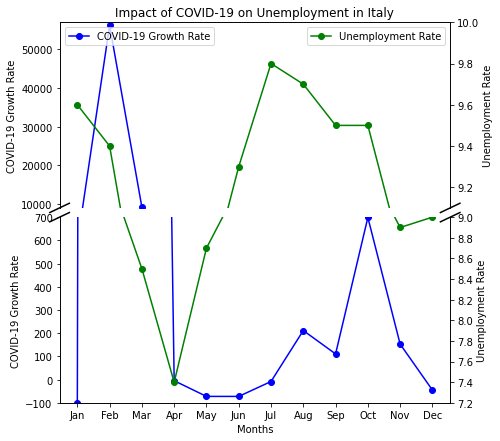

In [412]:
### import numpy as np
import matplotlib.pyplot as plt

#Setting name of month for each number of month
replace_values = {1 : 'Jan', 
                  2 : 'Feb', 
                  3 : 'Mar',
                  4  :  'Apr'  ,
                  5  :  'May'  ,
                  6  :  'Jun'  ,
                  7  :  'Jul'  ,
                  8  :  'Aug'  ,
                  9  :  'Sep'  ,
                  10  :  'Oct'  ,
                  11  :  'Nov'  ,
                  12  :  'Dec'  }                                                                                          
Italy = Italy.replace({"month": replace_values})

# Start with subplots
fig, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(7, 7))
fig.subplots_adjust(hspace=0.05)

# ax1 - is the top subplot
# ax2 - is the bottom subplot

# prepare twinned axes
ax3 = ax1.twinx()
ax4 = ax2.twinx()

# set limits for left y-axis
ax1.set_ylim(9000, 57000)  # outliers only
ax2.set_ylim(-100, 700)  # most of the data

# set limits for right y-axis (twinned)
ax3.set_ylim(9.1, 10.0)
ax4.set_ylim(7.2, 9.0)



# turn off spines
ax1.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)
ax3.spines['bottom'].set_visible(False)
ax4.spines['top'].set_visible(False)

# setup ticks
ax1.tick_params(bottom=False)
ax2.tick_params(bottom=True)

# plotting break diagonals
d = 0.025  # line length 
ax1.plot((-d, +d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax1.plot((1 - d, 1 + d), (-d, +d), c='k', clip_on=False, transform=ax1.transAxes)
ax2.plot((-d, +d), (1 - d, (1 + d)), c='k', clip_on=False, transform=ax2.transAxes)
ax2.plot((1 - d, 1 + d), (1 - d, 1 + d), c='k', clip_on=False, transform=ax2.transAxes)


x = Italy['month']
#yleft1 = df_aggregated['PG_Rate']
yleft2 = Italy['PG_Rate']
yright = Italy['Unemployment_Rate_Percent']

#ax1.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')
#ax2.plot(x, yleft1, c='b', label='COVID-19 Growth Rate')

ax1.plot(x, yleft2, c='b', label='COVID-19 Growth Rate',marker='o')
ax2.plot(x, yleft2, c='b', label='COVID-19 Growth Rate',marker='o')

ax3.plot(x, yright, c='g', label='Unemployment Rate',marker='o')
ax4.plot(x, yright, c='g', label='Unemployment Rate',marker='o')

ax1.legend(loc=2)
ax3.legend(loc=1)



ax1.set_title("Impact of COVID-19 on Unemployment in Italy")
ax1.set_ylabel("COVID-19 Growth Rate")
ax2.set_ylabel("COVID-19 Growth Rate")
ax3.set_ylabel("Unemployment Rate")
ax4.set_ylabel("Unemployment Rate")
ax2.set_xlabel("Months")

plt.show()

##### Observations

There exists high fluctuations between the COVID-19 Growth Rate and Unemployment Rate. Hence it is difficult to make any conclusions. We will get a better idea using the regression models

##### 2) Linear Regression (Italy)

##### Handling Outliers

In [413]:
df_Italy_copy = Italy.copy()
df_Italy_copy

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
36,2020,Italy,Jan,2.0,-100.0,-100.0,9.6
37,2020,Italy,Feb,1126.0,56200.0,56200.0,9.4
38,2020,Italy,Mar,104664.0,9195.2,9195.2,8.5
39,2020,Italy,Apr,99671.0,-4.8,-4.8,7.4
40,2020,Italy,May,27534.0,-72.4,-72.4,8.7
41,2020,Italy,Jun,7581.0,-72.5,-72.5,9.3
42,2020,Italy,Jul,6959.0,-8.2,-8.2,9.8
43,2020,Italy,Aug,21677.0,211.5,211.5,9.7
44,2020,Italy,Sep,45647.0,110.6,110.6,9.5
45,2020,Italy,Oct,364569.0,698.7,698.7,9.5


In [414]:
#Using the Capping Percentile Method
def percentile_capping(df, cols, from_low_end, from_high_end):
    for col in cols:

        stats.mstats.winsorize(a=df[col], limits=(from_low_end, from_high_end), inplace=True)




In [415]:
percentile_capping(df_Italy_copy, col_PG_Rate, 0.25, 0.25)

In [416]:
df_Italy_copy

,year,location,month,Monthly_new_cases,Percentage Growth Rate,PG_Rate,Unemployment_Rate_Percent
36,2020,Italy,Jan,2.0,-100.0,-45.2,9.6
37,2020,Italy,Feb,1126.0,56200.0,211.5,9.4
38,2020,Italy,Mar,104664.0,9195.2,211.5,8.5
39,2020,Italy,Apr,99671.0,-4.8,-4.8,7.4
40,2020,Italy,May,27534.0,-72.4,-45.2,8.7
41,2020,Italy,Jun,7581.0,-72.5,-45.2,9.3
42,2020,Italy,Jul,6959.0,-8.2,-8.2,9.8
43,2020,Italy,Aug,21677.0,211.5,211.5,9.7
44,2020,Italy,Sep,45647.0,110.6,110.6,9.5
45,2020,Italy,Oct,364569.0,698.7,211.5,9.5


r2 is 0.028385388272544665


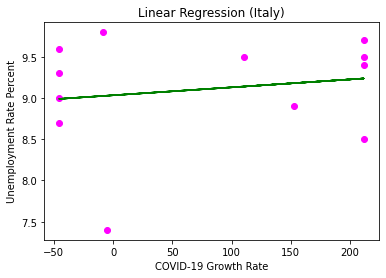

In [417]:
y =df_Italy_copy['Unemployment_Rate_Percent'].values.reshape(-1,1) #reshape() is used to convert from 1-D to 2-D
X=df_Italy_copy['PG_Rate'].values.reshape(-1,1)

#Calling linear regression function
regressor = LinearRegression()

#Training model using fit()
regressor.fit(X,y)

#Predicting model
y_pred=regressor.predict(X)

#Visualizing the output
plt.scatter(X, y, color = 'magenta')
plt.plot(X, y_pred, color = 'green')
plt.title('Linear Regression (Italy)')
plt.ylabel('Unemployment Rate Percent')
plt.xlabel('COVID-19 Growth Rate')

y_pred=regressor.predict(X)
r2 = r2_score(y,y_pred)
print('r2 is '+str(r2))

plt.show()

###### 3) Polynomial Regression (Italy) 

r2 is 0.04569225737342908


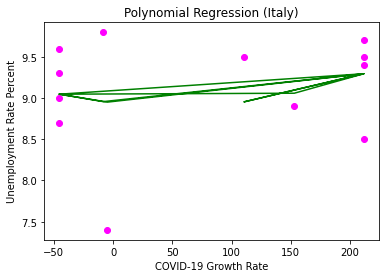

In [418]:
# X =df_MERGED['PG_Rate(-1,1) #reshape() is used to convert from 1-D to 2-D
y =df_Italy_copy['Unemployment_Rate_Percent'].values.reshape(-1,1)
X =df_Italy_copy['PG_Rate'].values.reshape(-1,1)

#Converting input feature into their higher order
poly=PolynomialFeatures(degree = 2)
X_poly = poly.fit_transform(X)
regressor = LinearRegression()
regressor.fit(X_poly,y)
y_poly_pred=regressor.predict(X_poly)

#Visualizing output
plt.scatter(X,y, color = 'magenta')
plt.plot(X, y_poly_pred, color = 'Green')
plt.title('Polynomial Regression (Italy)')
plt.ylabel('Unemployment Rate Percent')
plt.xlabel('COVID-19 Growth Rate')


r2 = r2_score(y,y_poly_pred)
print('r2 is '+str(r2))


plt.show()

##### Obseravation
Italy <br>
r2 values:-

- Linear Regression : 0.028385388272544665 = 0.02 = 2%
- Polynomyial Regression : 0.04569225737342908 = 0.04 = 4% <br>
In case of Italy, Polynomial Regression should be used over Linear Regression for further predictions as it is more accurate.
However, in both models the value of r square is very low, so it can't be an efficient way to predict unemployment rate based on covid cases in Italy.
The slope of the line of regression is almost parallel, meaning that Unemployment Rate and COVID-19 Growth Rate are idenpendent of each other
Therefore, only a slight impact on Unemployment due to increase in cases. (Since it is slighly going upwards) However, it is till parallel to x-axis

# Conclusion

We had considered in total 6 countries in this project.
- Among the 6 countries, almost all countries have a positive line of regression pointing in the upward direction
- This means that COVID-19 Growth Rate and Unemployment Rate are directly proportional.
- Increase in COVID-19 Cases results in increase in Unemployment Rate
- However, Italy had a linear regression line that was almost parallel to the x-axis , meaning that there exists no relation between COVID-19 Growth Rate and Unemployment Rate.
- If we compare the r2 values, it is seen that India has the highest r square values, meaning that it is most accurate followed by Germany. 
- Italy’s regression is least precise because the r square value is only 0.02

<br>
<br>

Hence, we conclude that COVID-19 has impacted the unemployment rate in most countries. 

Regaring CPI,on average it is observed that COVID Growth Rate is directly proportional to CPI in Germany


